Outline in this Notebook (**`01_data_loading.ipynb`**):

#### **Sections**
1. **Introduction**
   - Brief explanation of the datasets being loaded.

2. **Library Imports**
   - Import necessary libraries.

3. **Configuration Setup**
   - Load `config.yaml`.

4. **Dataset Loading**
   - Use the `data_loader.py` utility to load raw datasets.

5. **Initial Inspection**
   - Display basic stats and preview data.

6. **Save Cleaned Data**
   - Save cleaned datasets to `datasets/processed/`.



### **1. `Introduction`**
This notebook focuses on loading the raw datasets for the Dubai Real Estate Prediction project. We will:
1. Load datasets using `utils/data_loader.py`.
2. Inspect the structure and contents of the datasets.
3. Perform initial cleaning where necessary.
4. Save cleaned datasets to `datasets/processed/`.


### **2. `Library Imports`**

In [1]:
# Import necessary libraries
import os
import pandas as pd
import yaml
import sys

# Display settings
pd.set_option('display.max_colwidth', 50)  # Limit column width for better readability

# Import the data_loader module
import sys
import os

# Add the utils folder to sys.path to import data_loader
sys.path.append("../utils")

# Import the data_loader module
import data_loader
import data_processor
import seaborn as sns; sns.set_theme()


### **3. `Load Configuration`**

In [2]:
from data_loader import load_dataset

# Load configuration
config_path = "../configs/config.yaml"
with open(config_path, "r") as file:
    config = yaml.safe_load(file)

# Print paths and file structure for reference
raw_data_path = config["paths"]["raw_data"]
processed_data_path = config["paths"]["processed_data"]
external_data_path = config["paths"]["external_data"]

print(f"Raw Data Path: {raw_data_path}")
print(f"Processed Data Path: {processed_data_path}")
print(f"External Data Path: {external_data_path}")


Raw Data Path: ../datasets/raw
Processed Data Path: ../datasets/processed
External Data Path: ../datasets/external


### **4. `Dataset Loading and Inspection`**

- Expecting 7 Folders and 15 datasets as supplied and retrieved

#### 4.1 `rents.csv`

In [3]:
rents_df = data_loader.inspect_data("01_real_estate_rents", delimiter=";", show_progress=False,loading_method='parallel')

Loading 01_real_estate_rents from ../datasets/raw/Rents & Transactions/rents.csv...


Loading files in parallel:   0%|          | 0/1 [00:00<?, ?it/s]

Loading files in parallel: 100%|██████████| 1/1 [01:45<00:00, 105.53s/it]


Shape of 01_real_estate_rents: (5475131, 22)
Columns in 01_real_estate_rents:
Index(['Ejari Contract Number', 'Registration Date', 'Start Date', 'End Date',
       'Property ID', 'Version', 'Area', 'Contract Amount', 'Annual Amount',
       'Is Free Hold?', 'Property Size (sq.m)', 'Property Type',
       'Property Sub Type', 'Number of Rooms', 'Usage', 'Nearest Metro',
       'Nearest Mall', 'Nearest Landmark', 'Parking', 'No of Units',
       'Master Project', 'Project'],
      dtype='object')


- Original state of rents.csv

In [4]:
rents_df['Parking'].unique()

array([ nan,   0.,   1.,   2.,  51.,  21.,  78., 198.,  14., 167.,   7.,
        22., 112.,  36.,   4.,  15.,  96., 279.,  43.,  10.,  17.,  13.,
        68.,  40.,   5.,   3.,  11.,  20.,  25.,  30., 163.,  56., 107.,
         8.,  90.,   6.,  97., 147.,  12.,  35.,  39., 194.,  16.,  23.,
        41.,  29., 125.,  50.,  67.,  65.,  46.,   9.,  58.,  66.,  72.,
        26.,  37.,  48.,  85., 166., 111.,  70.,  71.,  53., 280.,  81.,
        60.,  54.,  18., 120.,  63.,  62.,  80., 121.,  49., 129., 267.,
       268.,  33.,  86., 200., 476.,  28., 340.,  19.,  99.,  27., 161.,
        44.,  95., 283., 189., 148.,  98.])

In [5]:
rents_df['Property Sub Type'].unique()

array(['Factory', 'Building', 'School', 'Warehouse', 'Flat', 'Shop',
       'Office', 'Showroom', 'Workshop', 'Restaurant',
       'Warehouse complex', 'Clinic', nan, 'Store', 'Shopping Center',
       'Labor Camps', 'Arabian House', 'GYM', 'Kiosk', 'Villa',
       'Open space', 'Studio ', 'Medical center', 'Pharmacy', 'Nursery',
       'Complex Villas', 'Mezzanine', 'Supermarket', 'Ladies Saloon',
       'kitchen', 'Desk', 'Hotel', 'Health club', 'Penthouse', 'Hospital',
       'Supermarket, a multi-section', 'Hotel apartments',
       'Resturants Complex', 'Parking', 'Bank', 'Spa', 'Garage',
       'Staff Accommodation', 'Farm', 'Storage', 'Portacabin',
       'Open Land', 'Complex Warehouse', 'Car Wash', 'Cinema',
       'Pertol station', 'College', 'swimming pool', 'Comercial Complex',
       'Petrol station', 'Villa addendum', 'ATM', 'Horse stable',
       'Endowments attached to mosques', 'Sign Board', 'Land Parking ',
       'Service Center', 'Medical Store', 'OPEN STORAGE SHED'

In [6]:
optimized_rents_df = data_processor.optimize_dataframe_memory(rents_df)
data_processor.display_dataframe_info(optimized_rents_df)

Original memory usage: 918.98 MB
Optimized memory usage: 346.39 MB
Shape: (5475131, 22)
Dtypes: ['Ejari Contract Number:int64', 'Registration Date:object', 'Start Date:category', 'End Date:category', 'Property ID:int64', 'Version:category', 'Area:category', 'Contract Amount:category', 'Annual Amount:category', 'Is Free Hold?:category', 'Property Size (sq.m):category', 'Property Type:category', 'Property Sub Type:category', 'Number of Rooms:float32', 'Usage:category', 'Nearest Metro:category', 'Nearest Mall:category', 'Nearest Landmark:category', 'Parking:float32', 'No of Units:int16', 'Master Project:category', 'Project:category']
Missings (%): ['Ejari Contract Number:0.00%', 'Registration Date:0.00%', 'Start Date:0.00%', 'End Date:0.00%', 'Property ID:0.00%', 'Version:0.00%', 'Area:0.01%', 'Contract Amount:0.00%', 'Annual Amount:0.00%', 'Is Free Hold?:0.00%', 'Property Size (sq.m):0.23%', 'Property Type:0.00%', 'Property Sub Type:0.73%', 'Number of Rooms:96.53%', 'Usage:1.01%', 'Neare

,Ejari Contract Number,Registration Date,Start Date,End Date,Property ID,Version,Area,Contract Amount,Annual Amount,Is Free Hold?,...,Property Sub Type,Number of Rooms,Usage,Nearest Metro,Nearest Mall,Nearest Landmark,Parking,No of Units,Master Project,Project
0,120210425000238,25/04/2021 09:36:31,13/04/2021 00:00:00,12/04/2026 00:00:00,1058329686,New,Dubai Investment Park Second,25000,5000,Free Hold,...,Factory,NaN,Industrial,NaN,NaN,Expo 2020 Site,NaN,1,NaN,NaN
1,120210526001582,26/05/2021 12:12:22,01/06/2021 00:00:00,30/11/2025 00:00:00,99539298,New,Um Nahad Third,16000000,4000000,Free Hold,...,Building,NaN,Residential,NaN,NaN,NaN,NaN,1,NaN,NaN


In [7]:
optimized_rents_df[['Registration Date','Number of Rooms','Property Type','Property Sub Type']].dropna()


,Registration Date,Number of Rooms,Property Type,Property Sub Type
863,21/12/2021 16:54:58,3.0,Villa,Villa
2086,03/02/2022 15:02:11,2.0,Villa,Villa
2111,04/01/2022 10:32:37,3.0,Villa,Villa
2199,07/01/2022 14:35:17,3.0,Villa,Villa
2240,09/02/2022 09:38:27,3.0,Villa,Villa
...,...,...,...,...
5473830,15/10/2014 12:07:01,2.0,Villa,Villa
5473855,19/11/2014 15:33:26,4.0,Villa,Villa
5473934,23/10/2014 10:47:46,4.0,Villa,Villa
5473955,23/10/2014 10:28:16,4.0,Villa,Villa


In [8]:
optimized_rents_df[optimized_rents_df['Number of Rooms'].notna()][['Registration Date','Number of Rooms', 'Property Type', 'Property Sub Type']]


,Registration Date,Number of Rooms,Property Type,Property Sub Type
863,21/12/2021 16:54:58,3.0,Villa,Villa
2086,03/02/2022 15:02:11,2.0,Villa,Villa
2111,04/01/2022 10:32:37,3.0,Villa,Villa
2199,07/01/2022 14:35:17,3.0,Villa,Villa
2240,09/02/2022 09:38:27,3.0,Villa,Villa
...,...,...,...,...
5473830,15/10/2014 12:07:01,2.0,Villa,Villa
5473855,19/11/2014 15:33:26,4.0,Villa,Villa
5473934,23/10/2014 10:47:46,4.0,Villa,Villa
5473955,23/10/2014 10:28:16,4.0,Villa,Villa


***Initial Processing Summary for `rents.csv`***


---

**2. Data Types Overview**
**Rental Transactions Schema** table with the missing percentages indicated and notes about data compression from `String` to `Category` where applicable:

| **Field Name**              | **Description**                                      | **Optimized Data Type** | **Notes**                              |
|-----------------------------|----------------------------------------------------|-------------------------|---------------------------------------|
| Ejari Contract Number       | Unique identifier for the rental contract           | `int64`                | No missing values                     |
| Registration Date           | Date of contract registration                       | `object`               | Convertible to datetime; no missing   |
| Start Date                  | Start date of the rental agreement                  | `category`             | Converted from `String`; no missing   |
| End Date                    | End date of the rental agreement                    | `category`             | Converted from `String`; no missing   |
| Property ID                 | Unique identifier for the property                  | `int64`                | No missing values                     |
| Version                     | Version of the contract                             | `category`             | Converted from `String`; no missing   |
| Area                        | Area of Dubai where the property is located         | `category`             | Converted from `String`; 0.01% missing |
| Contract Amount             | Total contract amount in AED                        | `category`             | Converted from `String`; no missing   |
| Annual Amount               | Annual rental amount in AED                         | `category`             | Converted from `String`; no missing   |
| Is Free Hold?               | Indicates if the property is freehold               | `category`             | Converted from `String`; no missing   |
| Property Size (sq.m)        | Area of the property in square meters               | `category`             | Converted from `String`; 0.23% missing |
| Property Type               | General type of property (Building, Land, Unit)     | `category`             | Converted from `String`; no missing   |
| Property Sub Type           | Specific subtype of property (e.g., Workshop, Studio) | `category`           | Converted from `String`; 0.73% missing |
| Number of Rooms             | Number of rooms in the property                     | `float32`             | 96.53% missing                        |
| Usage                       | Usage of the property (Commercial, Industrial, Residential) | `category`     | Converted from `String`; 1.01% missing |
| Nearest Metro               | Name of the nearest metro                           | `category`             | Converted from `String`; 10.27% missing |
| Nearest Mall                | Name of the nearest mall                            | `category`             | Converted from `String`; 10.94% missing |
| Nearest Landmark            | Name of the nearest landmark                        | `category`             | Converted from `String`; 6.33% missing |
| Parking                     | Number of parking spaces                            | `float32`             | 96.93% missing                        |
| No of Units                 | Number of units in the property                     | `int16`               | No missing values                     |
| Master Project              | Name of the master project                          | `category`             | Converted from `String`; 100% missing |
| Project                     | Name of the project                                 | `category`             | Converted from `String`; 85.49% missing |


---

 **3. Missing Values**
- **Total Missing Values (%):** 18.57% of the data.
- **Key Columns with High Missing Percentages:**
  - `Number of Rooms`: 96.53% missing  
  - `Parking`: 96.93% missing  
  - `Master Project`: 100% missing (may require exclusion)  
  - `Project`: 85.49% missing  

---

 **4. Duplicates**
- **Total Duplicates:** 6,398 rows (0.12% of total rows).  

---

**5. Initial Insights**
1. **Memory Optimization** significantly reduces dataset size, making it more efficient for analysis.  
2. High missing percentages in some columns (e.g., `Number of Rooms`, `Parking`, `Master Project`) suggest these fields may not be useful for modeling or analysis without imputation or further validation.  
3. Duplicates should be reviewed for removal, ensuring they don’t bias results.  
4. Categorical conversion for appropriate fields helps in reducing memory while preserving information.  

---

**6. Further Actions**
1. **Handle Missing Data:** 
   - Considering removal of columns like `Master Project` with 100% missing values. Others with over 90% can also be removed but we need to confirm their importance.
   - Exploring imputation strategies for other critical columns especially compulsory ones required for modeling.  
2. **Remove Duplicates:** Dropping duplicate rows to maintain data integrity.  
3. **Datetime Parsing:** Converting `Registration Date`, `Start Date`, and `End Date` into proper datetime objects.  
4. **Further Validation:** Checking for inconsistencies in categorical values and ensure data quality.

---

**We'll assess each feature's potential predictive value and feasibility of imputation:**

---

**Features with High Missing Values**
1. **Number of Rooms (96.53% missing):**
   - **Predictive Potential:** Likely high, as the number of rooms directly influences rental prices (e.g., more rooms typically mean higher rents).
   - **Imputation Feasibility:** Challenging due to limited data. Possible strategies include:
     - **Correlations:** Impute based on similar properties (e.g., property type, size).
     - **External Data:** Use averages for similar property types or areas.
   - **Recommended Approach:** Retain and attempt imputation. Flag for further evaluation after initial model testing.

2. **Parking (96.93% missing):**
   - **Predictive Potential:** Moderate. Parking availability can affect rental desirability but may not always correlate strongly with rent.
   - **Imputation Feasibility:** Similar to "Number of Rooms." If patterns exist (e.g., certain areas or property types typically offer parking), imputation might be possible.
   - **Recommended Approach:** Retain if computational resources allow. Otherwise, drop due to high missingness.

3. **Master Project (100% missing):**
   - **Predictive Potential:** Minimal unless the master project significantly influences rental prices.
   - **Imputation Feasibility:** Impossible due to complete missingness.
   - **Recommended Approach:** Drop.

4. **Project (85.49% missing):**
   - **Predictive Potential:** Potentially moderate. Projects may affect property desirability and, consequently, prices.
   - **Imputation Feasibility:** Difficult due to high missingness. Imputation could be based on areas or property types, but accuracy may suffer.
   - **Recommended Approach:** Drop unless we can retrieve external project data.

---

**Features with Moderate Missing Values**
5. **Nearest Metro (10.27% missing):**
   - **Predictive Potential:** High. Proximity to public transport is a critical factor in rental pricing.
   - **Imputation Feasibility:** Impute based on the property's area, as metro accessibility is often well-documented geographically. This is also one of the required features by the challenge organisers
   - **Recommended Approach:** Retain and impute.

6. **Nearest Mall (10.94% missing):**
   - **Predictive Potential:** Moderate. Malls might affect rents, but their impact may vary by property type (e.g., more for residential than industrial). It is however a required feature and cannot be dropped
   - **Imputation Feasibility:** Similar to "Nearest Metro." Impute using the area or external location data.
   - **Recommended APproach:** Retain and impute.

7. **Nearest Landmark (6.33% missing):**
   - **Predictive Potential:** Moderate. Some landmarks significantly influence rental prices (e.g., proximity to iconic locations). Required too.
   - **Imputation Feasibility:** Impute based on area or external geographic data.
   - **Recommended Approach:** Retain and impute.

---

**Features with Low Missing Values**
8. **Property Sub Type (0.73% missing):**
   - **Predictive Potential:** High. Subtype affects rental prices significantly (e.g., villa vs. apartment).
   - **Imputation Feasibility:** Straightforward imputation based on "Property Type" and "Usage." Required too.
   - **Recommended Approach:** Retain and impute.

9. **Property Size (sq.m) (0.23% missing):**
   - **Predictive Potential:** Very high. Property size is a primary determinant of rental prices.
   - **Imputation Feasibility:** Straightforward. Use averages based on similar properties. Not required though.
   - **Recommendation:** Retain and impute.

---

**Imputation Strategies**
1. **Categorical Features:**
   - Mode imputation based on relevant groupings (e.g., property type, area, usage).
   - External reference datasets for landmarks, metro stations, and malls.

2. **Numerical Features:**
   - Mean/median imputation for features like property size.
   - Correlation-based imputation for number of rooms and parking.

---

**Further Actions During Modeling**
1. **Initial Model Testing:**
   - We will train models using features with low/moderate missingness and drop high-missingness features (e.g., parking, project).
   - We wil assess the impact of imputing high-missingness features like "Number of Rooms."

2. **Evaluate Feature Importance:**
   - Use SHAP or permutation importance to assess the impact of retained features.
   - Drop low-importance features post-analysis.

3. **Explore External Data Sources:**
   - Augment the dataset with geographic or project-level data if available.


In [9]:
# sns.heatmap(rents_df.isnull(), cbar=False, cmap='viridis')

In [10]:
optimized_rents_df[['Usage','Nearest Metro','Nearest Mall','Nearest Landmark']].isnull().mean() * 100

Usage                1.007684
Nearest Metro       10.266184
Nearest Mall        10.938898
Nearest Landmark     6.333273
dtype: float64

<!-- Property Type or/and Property Sub Type
Number of rooms/bedrooms
Property Size (sq.m)
Area/Neighborhood
Nearest Metro
Nearest Mall
Nearest Landmark
Usage (commercial/residential)
Average prices the previous month/week (for the same kind of property) -->


- Some features are numeric but but currently labeled as objects. 
- Examples are "Contract Amount", "Annual Amount", "Property Size (sq.m)"

In [11]:
# Specify columns to format
datetime_cols = ["Registration Date", "Start Date", "End Date"]
numeric_cols = ["Contract Amount", "Annual Amount", "Property Size (sq.m)"]

# Initial cleaning by removing features with 99% missingness
processed_rents_df = data_processor.format_and_clean_table(df=optimized_rents_df, datetime_columns=datetime_cols, numeric_columns=numeric_cols, missing_threshold=0.99)
processed_rents_df = data_processor.optimize_dataframe_memory(processed_rents_df)
data_processor.display_dataframe_info(processed_rents_df)

Original memory usage: 532.36 MB
Optimized memory usage: 459.34 MB
Shape: (5469008, 21)
Dtypes: ['Ejari Contract Number:int64', 'Registration Date:datetime64[ns]', 'Start Date:category', 'End Date:datetime64[ns]', 'Property ID:int64', 'Version:category', 'Area:category', 'Contract Amount:float64', 'Annual Amount:float64', 'Is Free Hold?:category', 'Property Size (sq.m):float64', 'Property Type:category', 'Property Sub Type:category', 'Number of Rooms:float32', 'Usage:category', 'Nearest Metro:category', 'Nearest Mall:category', 'Nearest Landmark:category', 'Parking:float32', 'No of Units:int16', 'Project:category']
Missings (%): ['Ejari Contract Number:0.00%', 'Registration Date:0.00%', 'Start Date:0.00%', 'End Date:0.00%', 'Property ID:0.00%', 'Version:0.00%', 'Area:0.01%', 'Contract Amount:2.85%', 'Annual Amount:5.89%', 'Is Free Hold?:0.00%', 'Property Size (sq.m):49.95%', 'Property Type:0.00%', 'Property Sub Type:0.73%', 'Number of Rooms:96.53%', 'Usage:1.01%', 'Nearest Metro:10.27%

,Ejari Contract Number,Registration Date,Start Date,End Date,Property ID,Version,Area,Contract Amount,Annual Amount,Is Free Hold?,...,Property Type,Property Sub Type,Number of Rooms,Usage,Nearest Metro,Nearest Mall,Nearest Landmark,Parking,No of Units,Project
0,120210425000238,2021-04-25 09:36:31,2021-04-13,2026-04-12,1058329686,New,Dubai Investment Park Second,25000.0,5000.0,Free Hold,...,Building,Factory,NaN,Industrial,NaN,NaN,Expo 2020 Site,NaN,1,NaN
1,120210526001582,2021-05-26 12:12:22,2021-06-01,2025-11-30,99539298,New,Um Nahad Third,16000000.0,4000000.0,Free Hold,...,Building,Building,NaN,Residential,NaN,NaN,NaN,NaN,1,NaN


- Parking and Number of Rooms retained

In [12]:
invalid_dates = processed_rents_df[pd.to_datetime(processed_rents_df["Start Date"], format="%d/%m/%Y %H:%M:%S", errors='coerce').isna()]
print("Invalid date entries in 'Start Date':")
print(invalid_dates)


Invalid date entries in 'Start Date':
Empty DataFrame
Columns: [Ejari Contract Number, Registration Date, Start Date, End Date, Property ID, Version, Area, Contract Amount, Annual Amount, Is Free Hold?, Property Size (sq.m), Property Type, Property Sub Type, Number of Rooms, Usage, Nearest Metro, Nearest Mall, Nearest Landmark, Parking, No of Units, Project]
Index: []

[0 rows x 21 columns]


#### 4.2 `transactions.csv`

In [13]:
transactions_df = data_loader.inspect_data("02_real_estate_transactions", delimiter=";", show_progress=False,loading_method='parallel')

Loading 02_real_estate_transactions from ../datasets/raw/Rents & Transactions/transactions.csv...


Loading files in parallel: 100%|██████████| 1/1 [00:22<00:00, 22.72s/it]


Shape of 02_real_estate_transactions: (995975, 23)
Columns in 02_real_estate_transactions:
Index(['Transaction Number', 'Transaction Date', 'Property ID',
       'Transaction Type', 'Transaction sub type', 'Registration type',
       'Is Free Hold?', 'Usage', 'Area', 'Property Type', 'Property Sub Type',
       'Amount', 'Transaction Size (sq.m)', 'Property Size (sq.m)', 'Room(s)',
       'Parking', 'Nearest Metro', 'Nearest Mall', 'Nearest Landmark',
       'No. of Buyer', 'No. of Seller', 'Master Project', 'Project'],
      dtype='object')


In [14]:
transactions_df['Parking'].unique()

array([nan, '1', '2', ..., 'G157,158', 'G159,G160', 'B5-222'],
      dtype=object)

In [15]:
transactions_df['Property Sub Type'].unique()

array(['Residential', 'Commercial', 'Flat', 'Villa', 'Hotel Apartment',
       'Office', 'Residential Flats', nan, 'Hotel Rooms', 'Unit',
       'General Use', 'Labor Camp', 'Shop', 'Agricultural', 'Industrial',
       'Government Housing', 'Land', 'Sports Club', 'Show Rooms',
       'Workshop', 'Warehouse', 'Petrol Station', 'Gymnasium', 'Clinic',
       'Airport', 'Sized Partition', 'Stacked Townhouses', 'School',
       'Building', 'Exhbition Center', 'Parking', 'Car Services', 'Hotel',
       'Consulate', 'Residential / Attached Villas', 'Shopping Mall',
       'Hospital', 'Plants shop', 'Rest Area', 'General Authority',
       'Organizations', 'General Services',
       'Residential / Residential Villa', 'Mosque',
       'Multi Store Parcking', 'Embassy',
       'Commercial / Offices / Residential', 'Store'], dtype=object)

In [16]:
optimized_transactions_df = data_processor.optimize_dataframe_memory(transactions_df)
data_processor.display_dataframe_info(optimized_transactions_df)

Original memory usage: 174.77 MB
Optimized memory usage: 71.09 MB
Shape: (995975, 23)
Dtypes: ['Transaction Number:object', 'Transaction Date:object', 'Property ID:int32', 'Transaction Type:category', 'Transaction sub type:category', 'Registration type:category', 'Is Free Hold?:category', 'Usage:category', 'Area:category', 'Property Type:category', 'Property Sub Type:category', 'Amount:float64', 'Transaction Size (sq.m):float64', 'Property Size (sq.m):float64', 'Room(s):category', 'Parking:category', 'Nearest Metro:category', 'Nearest Mall:category', 'Nearest Landmark:category', 'No. of Buyer:float32', 'No. of Seller:float32', 'Master Project:category', 'Project:category']
Missings (%): ['Transaction Number:0.00%', 'Transaction Date:0.00%', 'Property ID:0.00%', 'Transaction Type:0.00%', 'Transaction sub type:0.00%', 'Registration type:0.00%', 'Is Free Hold?:0.00%', 'Usage:0.00%', 'Area:0.00%', 'Property Type:0.00%', 'Property Sub Type:2.23%', 'Amount:0.00%', 'Transaction Size (sq.m):12

,Transaction Number,Transaction Date,Property ID,Transaction Type,Transaction sub type,Registration type,Is Free Hold?,Usage,Area,Property Type,...,Property Size (sq.m),Room(s),Parking,Nearest Metro,Nearest Mall,Nearest Landmark,No. of Buyer,No. of Seller,Master Project,Project
0,13-7700-2022,02/06/2022 16:18,44581083,Mortgage,Mortgage Registration,Ready,Free Hold,Residential,AKOYA OXYGEN,Land,...,174.8,NaN,NaN,NaN,NaN,Dubai Cycling Course,0.0,0.0,NaN,DAMAC HILLS (2) - ODORA
1,13-7699-2022,02/06/2022 16:14,44014284,Mortgage,Mortgage Registration,Ready,Free Hold,Residential,AKOYA OXYGEN,Land,...,174.8,NaN,NaN,NaN,NaN,Dubai Cycling Course,0.0,0.0,NaN,DAMAC HILLS (2) - ZINNIA


**Transactions Data Schema** table with missing percentages and data compression details:

| **Field Name**              | **Description**                                           | **Optimized Data Type** | **Notes**                              |
|-----------------------------|----------------------------------------------------------|-------------------------|---------------------------------------|
| Transaction Number          | Unique identifier for the transaction                     | `object`               | No missing values                     |
| Transaction Date            | Date and time of the transaction                          | `object`               | Convertible to datetime; no missing   |
| Property ID                 | Unique identifier for the property                        | `int32`                | No missing values                     |
| Transaction Type            | Type of transaction (Sales, Gifts, Mortgage)             | `category`             | Converted from `String`; no missing   |
| Transaction sub type         | Subtype of the transaction (e.g., Delayed Sell, Mortgage) | `category`             | Converted from `String`; no missing   |
| Registration type           | Type of registration (Ready, Off-Plan)                   | `category`             | Converted from `String`; no missing   |
| Is Free Hold?               | Indicates if the property is freehold                    | `category`             | Converted from `String`; no missing   |
| Usage                       | Usage of the property (Commercial, Residential)          | `category`             | Converted from `String`; no missing   |
| Area                        | Area of Dubai where the property is located              | `category`             | Converted from `String`; no missing   |
| Property Type               | General type of property (Unit, Land, Building)          | `category`             | Converted from `String`; no missing   |
| Property Sub Type           | Specific subtype of property (e.g., Flat, Villa, Shop)   | `category`             | Converted from `String`; 2.23% missing |
| Amount                      | Transaction amount in AED                                 | `float64`              | No missing values                     |
| Transaction Size (sq.m)     | Area of the transaction in square meters                 | `float64`              | 12.62% missing                        |
| Property Size (sq.m)        | Area of the property in square meters                    | `float64`              | No missing values                     |
| Room(s)                     | Property layout (e.g., Studio, 1 B/R, 5 B/R)             | `category`             | Converted from `String`; 23.88% missing |
| Parking                     | Number of parking spaces                                 | `category`             | Converted from `String`; 49.53% missing |
| Nearest Metro               | Name of the nearest metro                                | `category`             | Converted from `String`; 21.70% missing |
| Nearest Mall                | Name of the nearest mall                                 | `category`             | Converted from `String`; 22.10% missing |
| Nearest Landmark            | Name of the nearest landmark                             | `category`             | Converted from `String`; 10.38% missing |
| No. of Buyer                | Number of buyers in the transaction                      | `float32`              | 0.02% missing                         |
| No. of Seller               | Number of sellers in the transaction                    | `float32`              | 0.02% missing                         |
| Master Project              | Name of the master project                               | `category`             | Converted from `String`; 99.97% missing |
| Project                     | Name of the project                                      | `category`             | Converted from `String`; 40.89% missing |

---

1. **Missing Data Indicators**:
   - Missing percentages are explicitly listed for each field.
   - Fields like `Master Project` and `Parking` have significant missing data and might need to be excluded or imputed.
   
2. **Compression Details**:
   - Several fields (e.g., `Transaction Type`, `Usage`, `Nearest Metro`) were optimized from `String` to `Category`, significantly reducing memory usage.

3. **Key Insights**:
   - Memory usage reduced from **174.77 MB** to **71.09 MB** (60% improvement).
   - Duplicates: **0**, indicating no redundancy.
   - Total missing data: **12.32%**, concentrated in fields like `Transaction Size`, `Room(s)`, and `Parking`.


In [17]:
# transactions_df['Room(s)'].unique()
transactions_df[['Transaction Number','Transaction Date']]

,Transaction Number,Transaction Date
0,13-7700-2022,02/06/2022 16:18
1,13-7699-2022,02/06/2022 16:14
2,14-563-2022,02/06/2022 15:42
3,11-12317-2022,02/06/2022 15:22
4,11-12316-2022,02/06/2022 15:07
...,...,...
995970,13-1699-1996,14/02/1996 00:00
995971,13-1701-1996,24/01/1996 00:00
995972,13-1742-1995,26/10/1995 00:00
995973,13-1746-1995,18/10/1995 00:00


In [18]:
# Specify columns to format
# datetime_cols = ["Transaction Date"]
numeric_cols = ["Parking"]

processed_transactions_df = data_processor.format_and_clean_table(df=optimized_transactions_df, missing_threshold=0.8)


- `Master Projects` eliminated now. `Project` will dropped later, possibly.

- **Consumer Price Index**

#### 4.3 `Consumer_Price_Index_Annually.csv`

In [19]:
cpi_annual_df = data_loader.inspect_data("03_cpi_annual", delimiter=",", show_progress=False,loading_method='parallel')


Loading 03_cpi_annual from ../datasets/raw/Consumer Price Index/Consumer_Price_Index_Annually.csv...


Loading files in parallel: 100%|██████████| 1/1 [00:03<00:00,  3.95s/it]


Shape of 03_cpi_annual: (369, 12)
Columns in 03_cpi_annual:
Index(['DATAFLOW', 'MEASURE', 'UNIT_MEASURE', 'REF_AREA', 'FREQ', 'CPI_DIV',
       'SOURCE_DETAIL', 'TIME_PERIOD', 'OBS_VALUE', 'DECIMALS', 'OBS_STATUS',
       'UNIT_MULT'],
      dtype='object')


In [20]:
cpi_annual_df.isnull().mean() * 100

DATAFLOW           0.0
MEASURE            0.0
UNIT_MEASURE       0.0
REF_AREA           0.0
FREQ               0.0
CPI_DIV            0.0
SOURCE_DETAIL      0.0
TIME_PERIOD        0.0
OBS_VALUE          0.0
DECIMALS           0.0
OBS_STATUS       100.0
UNIT_MULT        100.0
dtype: float64

In [ ]:
cpi_annual_df

,DATAFLOW,MEASURE,UNIT_MEASURE,REF_AREA,FREQ,CPI_DIV,SOURCE_DETAIL,TIME_PERIOD,OBS_VALUE,DECIMALS,OBS_STATUS,UNIT_MULT
0,FCSA:DF_CPI_ANN(3.2.0),CPI_INDEX21,INDX,AE,A,FUR,FCSA,2021,100.000000,2,NaN,NaN
1,FCSA:DF_CPI_ANN(3.2.0),CPI_INDEX21,INDX,AE,A,FUR,FCSA,2022,100.020000,2,NaN,NaN
2,FCSA:DF_CPI_ANN(3.2.0),CPI_INDEX21,INDX,AE,A,FUR,FCSA,2023,103.223874,2,NaN,NaN
3,FCSA:DF_CPI_ANN(3.2.0),CPI_ANNCHG,PERCENT,AE,A,TEX,FCSA,2010,-4.960000,2,NaN,NaN
4,FCSA:DF_CPI_ANN(3.2.0),CPI_ANNCHG,PERCENT,AE,A,TEX,FCSA,2011,-1.870000,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
364,FCSA:DF_CPI_ANN(3.2.0),CPI_ANNCHG,PERCENT,AE,A,REC,FCSA,2021,3.110000,2,NaN,NaN
365,FCSA:DF_CPI_ANN(3.2.0),CPI_ANNCHG21,PERCENT,AE,A,EDU,FCSA,2022,0.950000,2,NaN,NaN
366,FCSA:DF_CPI_ANN(3.2.0),CPI_ANNCHG21,PERCENT,AE,A,EDU,FCSA,2023,1.372461,2,NaN,NaN
367,FCSA:DF_CPI_ANN(3.2.0),CPI_ANNCHG21,PERCENT,AE,A,RES,FCSA,2022,7.190000,2,NaN,NaN


In [22]:
# datetime_cols = ["TIME_PERIOD"]
# numeric_cols = ["Transaction Number"]

processed_cpi_annual_df = data_processor.format_and_clean_table(df=cpi_annual_df, missing_threshold=0.8)


In [23]:
processed_cpi_annual_df.isnull().mean() * 100

DATAFLOW         0.0
MEASURE          0.0
UNIT_MEASURE     0.0
REF_AREA         0.0
FREQ             0.0
CPI_DIV          0.0
SOURCE_DETAIL    0.0
TIME_PERIOD      0.0
OBS_VALUE        0.0
DECIMALS         0.0
dtype: float64

In [24]:
# optimized_cpi_annual_df = data_processor.optimize_dataframe_memory(cpi_annual_df)
data_processor.display_dataframe_info(processed_cpi_annual_df)


Shape: (369, 10)
Dtypes: ['DATAFLOW:object', 'MEASURE:object', 'UNIT_MEASURE:object', 'REF_AREA:object', 'FREQ:object', 'CPI_DIV:object', 'SOURCE_DETAIL:object', 'TIME_PERIOD:int64', 'OBS_VALUE:float64', 'DECIMALS:int64']
Missings (%): ['DATAFLOW:0.00%', 'MEASURE:0.00%', 'UNIT_MEASURE:0.00%', 'REF_AREA:0.00%', 'FREQ:0.00%', 'CPI_DIV:0.00%', 'SOURCE_DETAIL:0.00%', 'TIME_PERIOD:0.00%', 'OBS_VALUE:0.00%', 'DECIMALS:0.00%']
Total missings (%): 0.00%
total duplicates: 0
Total memory usage: 0.03 MB


,DATAFLOW,MEASURE,UNIT_MEASURE,REF_AREA,FREQ,CPI_DIV,SOURCE_DETAIL,TIME_PERIOD,OBS_VALUE,DECIMALS
0,FCSA:DF_CPI_ANN(3.2.0),CPI_INDEX21,INDX,AE,A,FUR,FCSA,2021,100.00,2
1,FCSA:DF_CPI_ANN(3.2.0),CPI_INDEX21,INDX,AE,A,FUR,FCSA,2022,100.02,2


#### 4.4 `Consumer_Price_Index_Monthly.csv`

In [25]:
cpi_monthly_df = data_loader.inspect_data("04_cpi_monthly", delimiter=",", show_progress=False,loading_method='parallel')


Loading 04_cpi_monthly from ../datasets/raw/Consumer Price Index/Consumer_Price_Index_Monthly.csv...


Loading files in parallel: 100%|██████████| 1/1 [00:03<00:00,  3.47s/it]


Shape of 04_cpi_monthly: (7361, 12)
Columns in 04_cpi_monthly:
Index(['DATAFLOW', 'MEASURE', 'UNIT_MEASURE', 'REF_AREA', 'FREQ', 'CPI_DIV',
       'SOURCE_DETAIL', 'TIME_PERIOD', 'OBS_VALUE', 'DECIMALS', 'OBS_STATUS',
       'UNIT_MULT'],
      dtype='object')


In [26]:
cpi_monthly_df.isnull().mean() * 100

DATAFLOW           0.0
MEASURE            0.0
UNIT_MEASURE       0.0
REF_AREA           0.0
FREQ               0.0
CPI_DIV            0.0
SOURCE_DETAIL      0.0
TIME_PERIOD        0.0
OBS_VALUE          0.0
DECIMALS           0.0
OBS_STATUS       100.0
UNIT_MULT        100.0
dtype: float64

In [27]:
cpi_monthly_df

,DATAFLOW,MEASURE,UNIT_MEASURE,REF_AREA,FREQ,CPI_DIV,SOURCE_DETAIL,TIME_PERIOD,OBS_VALUE,DECIMALS,OBS_STATUS,UNIT_MULT
0,FCSA:DF_CPI(3.2.0),CPI_ANNCHG,PERCENT,AE,M,FUR,FCSA,2009-01,7.250000,2,NaN,NaN
1,FCSA:DF_CPI(3.2.0),CPI_ANNCHG,PERCENT,AE,M,FUR,FCSA,2009-02,3.870000,2,NaN,NaN
2,FCSA:DF_CPI(3.2.0),CPI_ANNCHG,PERCENT,AE,M,FUR,FCSA,2009-03,4.700000,2,NaN,NaN
3,FCSA:DF_CPI(3.2.0),CPI_ANNCHG,PERCENT,AE,M,FUR,FCSA,2009-04,1.900000,2,NaN,NaN
4,FCSA:DF_CPI(3.2.0),CPI_ANNCHG,PERCENT,AE,M,FUR,FCSA,2009-05,5.250000,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7356,FCSA:DF_CPI(3.2.0),CPI_MTHCHG,PERCENT,AE,M,INS,FCSA,2024-03,-1.114635,2,NaN,NaN
7357,FCSA:DF_CPI(3.2.0),CPI_MTHCHG,PERCENT,AE,M,INS,FCSA,2024-04,-0.022338,2,NaN,NaN
7358,FCSA:DF_CPI(3.2.0),CPI_MTHCHG,PERCENT,AE,M,INS,FCSA,2024-05,-0.005594,2,NaN,NaN
7359,FCSA:DF_CPI(3.2.0),CPI_MTHCHG,PERCENT,AE,M,INS,FCSA,2024-06,2.137716,2,NaN,NaN


In [28]:
processed_cpi_monthly_df = data_processor.format_and_clean_table(df=cpi_monthly_df, missing_threshold=0.8)


In [29]:
# optimized_cpi_monthly_df = data_processor.optimize_dataframe_memory(cpi_monthly_df)
data_processor.display_dataframe_info(processed_cpi_monthly_df)


Shape: (7361, 10)
Dtypes: ['DATAFLOW:object', 'MEASURE:object', 'UNIT_MEASURE:object', 'REF_AREA:object', 'FREQ:object', 'CPI_DIV:object', 'SOURCE_DETAIL:object', 'TIME_PERIOD:object', 'OBS_VALUE:float64', 'DECIMALS:int64']
Missings (%): ['DATAFLOW:0.00%', 'MEASURE:0.00%', 'UNIT_MEASURE:0.00%', 'REF_AREA:0.00%', 'FREQ:0.00%', 'CPI_DIV:0.00%', 'SOURCE_DETAIL:0.00%', 'TIME_PERIOD:0.00%', 'OBS_VALUE:0.00%', 'DECIMALS:0.00%']
Total missings (%): 0.00%
total duplicates: 0
Total memory usage: 0.56 MB


,DATAFLOW,MEASURE,UNIT_MEASURE,REF_AREA,FREQ,CPI_DIV,SOURCE_DETAIL,TIME_PERIOD,OBS_VALUE,DECIMALS
0,FCSA:DF_CPI(3.2.0),CPI_ANNCHG,PERCENT,AE,M,FUR,FCSA,2009-01,7.25,2
1,FCSA:DF_CPI(3.2.0),CPI_ANNCHG,PERCENT,AE,M,FUR,FCSA,2009-02,3.87,2


#### 4.5 `Consumer_Price_Index_Quarterly.csv`

In [30]:
cpi_quarterly_df = data_loader.inspect_data("05_cpi_quarterly", delimiter=",", show_progress=False,loading_method='parallel')


Loading 05_cpi_quarterly from ../datasets/raw/Consumer Price Index/Consumer_Price_Index_Quarterly.csv...


Loading files in parallel:   0%|          | 0/1 [00:00<?, ?it/s]

Loading files in parallel: 100%|██████████| 1/1 [00:03<00:00,  3.23s/it]


Shape of 05_cpi_quarterly: (112, 12)
Columns in 05_cpi_quarterly:
Index(['DATAFLOW', 'MEASURE', 'UNIT_MEASURE', 'REF_AREA', 'FREQ', 'CPI_DIV',
       'SOURCE_DETAIL', 'TIME_PERIOD', 'OBS_VALUE', 'DECIMALS', 'OBS_STATUS',
       'UNIT_MULT'],
      dtype='object')


In [31]:
cpi_quarterly_df

,DATAFLOW,MEASURE,UNIT_MEASURE,REF_AREA,FREQ,CPI_DIV,SOURCE_DETAIL,TIME_PERIOD,OBS_VALUE,DECIMALS,OBS_STATUS,UNIT_MULT
0,FCSA:DF_CPI_Q(3.2.0),CPI_QCHNG,PERCENT,AE,Q,HOU,FCSA,2022-Q1,-1.851788,2,NaN,NaN
1,FCSA:DF_CPI_Q(3.2.0),CPI_QCHNG,PERCENT,AE,Q,HOU,FCSA,2022-Q2,-1.001258,2,NaN,NaN
2,FCSA:DF_CPI_Q(3.2.0),CPI_QCHNG,PERCENT,AE,Q,HOU,FCSA,2022-Q3,0.119038,2,NaN,NaN
3,FCSA:DF_CPI_Q(3.2.0),CPI_QCHNG,PERCENT,AE,Q,HOU,FCSA,2022-Q4,1.605925,2,NaN,NaN
4,FCSA:DF_CPI_Q(3.2.0),CPI_QCHNG,PERCENT,AE,Q,HOU,FCSA,2023-Q1,2.451617,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
107,FCSA:DF_CPI_Q(3.2.0),CPI_QCHNG,PERCENT,AE,Q,TEX,FCSA,2022-Q4,4.129407,2,NaN,NaN
108,FCSA:DF_CPI_Q(3.2.0),CPI_QCHNG,PERCENT,AE,Q,TEX,FCSA,2023-Q1,4.650506,2,NaN,NaN
109,FCSA:DF_CPI_Q(3.2.0),CPI_QCHNG,PERCENT,AE,Q,TEX,FCSA,2023-Q2,3.903968,2,NaN,NaN
110,FCSA:DF_CPI_Q(3.2.0),CPI_QCHNG,PERCENT,AE,Q,TEX,FCSA,2023-Q3,2.964095,2,NaN,NaN


In [32]:
cpi_quarterly_df.isnull().mean() * 100

DATAFLOW           0.0
MEASURE            0.0
UNIT_MEASURE       0.0
REF_AREA           0.0
FREQ               0.0
CPI_DIV            0.0
SOURCE_DETAIL      0.0
TIME_PERIOD        0.0
OBS_VALUE          0.0
DECIMALS           0.0
OBS_STATUS       100.0
UNIT_MULT        100.0
dtype: float64

In [33]:
processed_cpi_quarterly_df = data_processor.format_and_clean_table(df=cpi_quarterly_df, missing_threshold=0.8)


In [34]:
# optimized_cpi_monthly_df = data_processor.optimize_dataframe_memory(cpi_monthly_df)
data_processor.display_dataframe_info(processed_cpi_quarterly_df)


Shape: (112, 10)
Dtypes: ['DATAFLOW:object', 'MEASURE:object', 'UNIT_MEASURE:object', 'REF_AREA:object', 'FREQ:object', 'CPI_DIV:object', 'SOURCE_DETAIL:object', 'TIME_PERIOD:object', 'OBS_VALUE:float64', 'DECIMALS:int64']
Missings (%): ['DATAFLOW:0.00%', 'MEASURE:0.00%', 'UNIT_MEASURE:0.00%', 'REF_AREA:0.00%', 'FREQ:0.00%', 'CPI_DIV:0.00%', 'SOURCE_DETAIL:0.00%', 'TIME_PERIOD:0.00%', 'OBS_VALUE:0.00%', 'DECIMALS:0.00%']
Total missings (%): 0.00%
total duplicates: 0
Total memory usage: 0.01 MB


,DATAFLOW,MEASURE,UNIT_MEASURE,REF_AREA,FREQ,CPI_DIV,SOURCE_DETAIL,TIME_PERIOD,OBS_VALUE,DECIMALS
0,FCSA:DF_CPI_Q(3.2.0),CPI_QCHNG,PERCENT,AE,Q,HOU,FCSA,2022-Q1,-1.851788,2
1,FCSA:DF_CPI_Q(3.2.0),CPI_QCHNG,PERCENT,AE,Q,HOU,FCSA,2022-Q2,-1.001258,2


- Population

#### 4.6 `Population_Estimates_and_Growth_by_Gender.csv`

In [35]:
pop_estimates_df = data_loader.inspect_data("06_population_estimates", delimiter=",", show_progress=False,loading_method='parallel')


Loading 06_population_estimates from ../datasets/raw/Population/Population_Estimates_and_Growth_by_Gender.csv...


Loading files in parallel: 100%|██████████| 1/1 [00:03<00:00,  3.42s/it]


Shape of 06_population_estimates: (162, 11)
Columns in 06_population_estimates:
Index(['DATAFLOW', 'MEASURE', 'POP_IND', 'UNIT_MEASURE', 'REF_AREA', 'FREQ',
       'GENDER', 'SOURCE_DETAIL', 'TIME_PERIOD', 'OBS_VALUE', 'DECIMALS'],
      dtype='object')


In [36]:
# Check unique values in REF_AREA column
print(pop_estimates_df['REF_AREA'].unique())


['AE']


In [37]:
pop_estimates_df.isnull().mean() * 100

DATAFLOW           0.0
MEASURE            0.0
POP_IND            0.0
UNIT_MEASURE       0.0
REF_AREA           0.0
FREQ               0.0
GENDER             0.0
SOURCE_DETAIL      0.0
TIME_PERIOD        0.0
OBS_VALUE          0.0
DECIMALS         100.0
dtype: float64

In [38]:
pop_estimates_df

,DATAFLOW,MEASURE,POP_IND,UNIT_MEASURE,REF_AREA,FREQ,GENDER,SOURCE_DETAIL,TIME_PERIOD,OBS_VALUE,DECIMALS
0,FCSA:DF_POP(2.7.0),POP,_Z,PS,AE,A,M,FCSC,1970,149195,NaN
1,FCSA:DF_POP(2.7.0),POP,_Z,PS,AE,A,M,FCSC,1971,181473,NaN
2,FCSA:DF_POP(2.7.0),POP,_Z,PS,AE,A,M,FCSC,1972,221774,NaN
3,FCSA:DF_POP(2.7.0),POP,_Z,PS,AE,A,M,FCSC,1973,268398,NaN
4,FCSA:DF_POP(2.7.0),POP,_Z,PS,AE,A,M,FCSC,1974,322544,NaN
...,...,...,...,...,...,...,...,...,...,...,...
157,FCSA:DF_POP(2.7.0),POP,_Z,PS,AE,A,_T,FCSC,2019,9512778,NaN
158,FCSA:DF_POP(2.7.0),POP,_Z,PS,AE,A,_T,FCSC,2020,9289297,NaN
159,FCSA:DF_POP(2.7.0),POP,_Z,PS,AE,A,_T,FCSC,2021,9861007,NaN
160,FCSA:DF_POP(2.7.0),POP,_Z,PS,AE,A,_T,FCSC,2022,10288946,NaN


In [39]:
processed_pop_estimates_df = data_processor.format_and_clean_table(df=pop_estimates_df, missing_threshold=0.8)


In [40]:
# optimized_cpi_monthly_df = data_processor.optimize_dataframe_memory(cpi_monthly_df)
data_processor.display_dataframe_info(processed_pop_estimates_df)


Shape: (162, 10)
Dtypes: ['DATAFLOW:object', 'MEASURE:object', 'POP_IND:object', 'UNIT_MEASURE:object', 'REF_AREA:object', 'FREQ:object', 'GENDER:object', 'SOURCE_DETAIL:object', 'TIME_PERIOD:int64', 'OBS_VALUE:int64']
Missings (%): ['DATAFLOW:0.00%', 'MEASURE:0.00%', 'POP_IND:0.00%', 'UNIT_MEASURE:0.00%', 'REF_AREA:0.00%', 'FREQ:0.00%', 'GENDER:0.00%', 'SOURCE_DETAIL:0.00%', 'TIME_PERIOD:0.00%', 'OBS_VALUE:0.00%']
Total missings (%): 0.00%
total duplicates: 0
Total memory usage: 0.01 MB


,DATAFLOW,MEASURE,POP_IND,UNIT_MEASURE,REF_AREA,FREQ,GENDER,SOURCE_DETAIL,TIME_PERIOD,OBS_VALUE
0,FCSA:DF_POP(2.7.0),POP,_Z,PS,AE,A,M,FCSC,1970,149195
1,FCSA:DF_POP(2.7.0),POP,_Z,PS,AE,A,M,FCSC,1971,181473


#### 4.7 `Population_Indicators.csv`

In [41]:
pop_indicators_df = data_loader.inspect_data("07_population_indicators", delimiter=",", show_progress=False,loading_method='parallel')


Loading 07_population_indicators from ../datasets/raw/Population/Population_Indicators.csv...


Loading files in parallel: 100%|██████████| 1/1 [00:03<00:00,  3.53s/it]


Shape of 07_population_indicators: (18, 11)
Columns in 07_population_indicators:
Index(['DATAFLOW', 'MEASURE', 'POP_IND', 'UNIT_MEASURE', 'REF_AREA', 'FREQ',
       'GENDER', 'SOURCE_DETAIL', 'TIME_PERIOD', 'OBS_VALUE', 'DECIMALS'],
      dtype='object')


In [42]:
pop_indicators_df.isnull().mean() * 100

DATAFLOW         0.0
MEASURE          0.0
POP_IND          0.0
UNIT_MEASURE     0.0
REF_AREA         0.0
FREQ             0.0
GENDER           0.0
SOURCE_DETAIL    0.0
TIME_PERIOD      0.0
OBS_VALUE        0.0
DECIMALS         0.0
dtype: float64

In [43]:
data_processor.display_dataframe_info(pop_indicators_df)

Shape: (18, 11)
Dtypes: ['DATAFLOW:object', 'MEASURE:object', 'POP_IND:object', 'UNIT_MEASURE:object', 'REF_AREA:object', 'FREQ:object', 'GENDER:object', 'SOURCE_DETAIL:object', 'TIME_PERIOD:int64', 'OBS_VALUE:float64', 'DECIMALS:int64']
Missings (%): ['DATAFLOW:0.00%', 'MEASURE:0.00%', 'POP_IND:0.00%', 'UNIT_MEASURE:0.00%', 'REF_AREA:0.00%', 'FREQ:0.00%', 'GENDER:0.00%', 'SOURCE_DETAIL:0.00%', 'TIME_PERIOD:0.00%', 'OBS_VALUE:0.00%', 'DECIMALS:0.00%']
Total missings (%): 0.00%
total duplicates: 0
Total memory usage: 0.00 MB


,DATAFLOW,MEASURE,POP_IND,UNIT_MEASURE,REF_AREA,FREQ,GENDER,SOURCE_DETAIL,TIME_PERIOD,OBS_VALUE,DECIMALS
0,FCSA:DF_POP_IND(2.7.0),POPIND,MED,YEARS,AE,A,_Z,FCSC,2019,31.3,1
1,FCSA:DF_POP_IND(2.7.0),POPIND,MED,YEARS,AE,A,_Z,FCSC,2020,32.8,1


- Tourism

#### 4.8 `Guests_by_Hotel_Type_by_Region.csv`

In [44]:
tourism_regions_df = data_loader.inspect_data("08_tourism_regions", delimiter=",", show_progress=False,loading_method='parallel')


Loading 08_tourism_regions from ../datasets/raw/Tourism/Guests_by_Hotel_Type_by_Region.csv...


Loading files in parallel: 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]


Shape of 08_tourism_regions: (664, 15)
Columns in 08_tourism_regions:
Index(['DATAFLOW', 'MEASURE', 'UNIT_MEASURE', 'REF_AREA', 'FREQ', 'H_TYPE',
       'H_INDICATOR', 'GUEST_REGION', 'SOURCE_DETAIL', 'TIME_PERIOD',
       'OBS_VALUE', 'DECIMALS', 'OBS_STATUS', 'OBS_COMMENT', 'UNIT_MULT'],
      dtype='object')


In [45]:
tourism_regions_df.isnull().mean() * 100

DATAFLOW           0.0
MEASURE            0.0
UNIT_MEASURE       0.0
REF_AREA           0.0
FREQ               0.0
H_TYPE             0.0
H_INDICATOR        0.0
GUEST_REGION       0.0
SOURCE_DETAIL      0.0
TIME_PERIOD        0.0
OBS_VALUE          0.0
DECIMALS         100.0
OBS_STATUS       100.0
OBS_COMMENT      100.0
UNIT_MULT        100.0
dtype: float64

In [46]:
processed_tourism_regions_df = data_processor.format_and_clean_table(df=tourism_regions_df, missing_threshold=0.8)


In [47]:
data_processor.display_dataframe_info(processed_tourism_regions_df)

Shape: (664, 11)
Dtypes: ['DATAFLOW:object', 'MEASURE:object', 'UNIT_MEASURE:object', 'REF_AREA:object', 'FREQ:object', 'H_TYPE:object', 'H_INDICATOR:object', 'GUEST_REGION:object', 'SOURCE_DETAIL:object', 'TIME_PERIOD:int64', 'OBS_VALUE:int64']
Missings (%): ['DATAFLOW:0.00%', 'MEASURE:0.00%', 'UNIT_MEASURE:0.00%', 'REF_AREA:0.00%', 'FREQ:0.00%', 'H_TYPE:0.00%', 'H_INDICATOR:0.00%', 'GUEST_REGION:0.00%', 'SOURCE_DETAIL:0.00%', 'TIME_PERIOD:0.00%', 'OBS_VALUE:0.00%']
Total missings (%): 0.00%
total duplicates: 0
Total memory usage: 0.06 MB


,DATAFLOW,MEASURE,UNIT_MEASURE,REF_AREA,FREQ,H_TYPE,H_INDICATOR,GUEST_REGION,SOURCE_DETAIL,TIME_PERIOD,OBS_VALUE
0,FCSA:DF_GUEST_REGION(4.3.0),H,NUMBER,AE,A,_Z,GHH,OC,FCSC,2015,399751
1,FCSA:DF_GUEST_REGION(4.3.0),H,NUMBER,AE,A,_Z,GHH,OC,FCSC,2016,380717


#### 4.9 `Hotel_Establishments_and_Rooms_by_Rating_Type.csv`

In [48]:
tourism_ratings_df = data_loader.inspect_data("09_tourism_ratings", delimiter=",", show_progress=False,loading_method='parallel')


Loading 09_tourism_ratings from ../datasets/raw/Tourism/Hotel_Establishments_and_Rooms_by_Rating_Type.csv...


Loading files in parallel: 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]


Shape of 09_tourism_ratings: (400, 15)
Columns in 09_tourism_ratings:
Index(['DATAFLOW', 'MEASURE', 'UNIT_MEASURE', 'REF_AREA', 'FREQ', 'H_TYPE',
       'H_INDICATOR', 'GUEST_REGION', 'SOURCE_DETAIL', 'TIME_PERIOD',
       'OBS_VALUE', 'DECIMALS', 'OBS_STATUS', 'OBS_COMMENT', 'UNIT_MULT'],
      dtype='object')


In [49]:
tourism_ratings_df.isnull().mean() * 100

DATAFLOW           0.0
MEASURE            0.0
UNIT_MEASURE       0.0
REF_AREA           0.0
FREQ               0.0
H_TYPE             0.0
H_INDICATOR        0.0
GUEST_REGION       0.0
SOURCE_DETAIL      0.0
TIME_PERIOD        0.0
OBS_VALUE          0.0
DECIMALS         100.0
OBS_STATUS       100.0
OBS_COMMENT      100.0
UNIT_MULT        100.0
dtype: float64

In [50]:
processed_tourism_ratings_df = data_processor.format_and_clean_table(df=tourism_ratings_df, missing_threshold=0.8)


In [51]:
data_processor.display_dataframe_info(processed_tourism_ratings_df)

Shape: (400, 11)
Dtypes: ['DATAFLOW:object', 'MEASURE:object', 'UNIT_MEASURE:object', 'REF_AREA:object', 'FREQ:object', 'H_TYPE:object', 'H_INDICATOR:object', 'GUEST_REGION:object', 'SOURCE_DETAIL:object', 'TIME_PERIOD:int64', 'OBS_VALUE:int64']
Missings (%): ['DATAFLOW:0.00%', 'MEASURE:0.00%', 'UNIT_MEASURE:0.00%', 'REF_AREA:0.00%', 'FREQ:0.00%', 'H_TYPE:0.00%', 'H_INDICATOR:0.00%', 'GUEST_REGION:0.00%', 'SOURCE_DETAIL:0.00%', 'TIME_PERIOD:0.00%', 'OBS_VALUE:0.00%']
Total missings (%): 0.00%
total duplicates: 0
Total memory usage: 0.03 MB


,DATAFLOW,MEASURE,UNIT_MEASURE,REF_AREA,FREQ,H_TYPE,H_INDICATOR,GUEST_REGION,SOURCE_DETAIL,TIME_PERIOD,OBS_VALUE
0,FCSA:DF_HOT_TYPE(4.3.0),H,NUMBER,AE,A,_T,EST,_Z,FCSC,2014,1027
1,FCSA:DF_HOT_TYPE(4.3.0),H,NUMBER,AE,A,_T,EST,_Z,FCSC,2015,1056


#### 4.10 `Hotel_Establishments_Main_Indicators.csv`

In [52]:
tourism_indicators_df = data_loader.inspect_data("10_tourism_indicators", delimiter=",", show_progress=False,loading_method='parallel')


Loading 10_tourism_indicators from ../datasets/raw/Tourism/Hotel_Establishments_Main_Indicators.csv...


Loading files in parallel: 100%|██████████| 1/1 [00:06<00:00,  6.35s/it]


Shape of 10_tourism_indicators: (201, 15)
Columns in 10_tourism_indicators:
Index(['DATAFLOW', 'MEASURE', 'UNIT_MEASURE', 'REF_AREA', 'FREQ', 'H_TYPE',
       'H_INDICATOR', 'GUEST_REGION', 'SOURCE_DETAIL', 'TIME_PERIOD',
       'OBS_VALUE', 'DECIMALS', 'OBS_STATUS', 'OBS_COMMENT', 'UNIT_MULT'],
      dtype='object')


In [53]:
tourism_indicators_df['DECIMALS'].unique()

array([nan,  2.,  0.])

In [54]:
tourism_indicators_df.isnull().mean() * 100

DATAFLOW           0.000000
MEASURE            0.000000
UNIT_MEASURE       0.000000
REF_AREA           0.000000
FREQ               0.000000
H_TYPE             0.000000
H_INDICATOR        0.000000
GUEST_REGION       0.000000
SOURCE_DETAIL      0.000000
TIME_PERIOD        0.000000
OBS_VALUE          0.000000
DECIMALS          82.089552
OBS_STATUS       100.000000
OBS_COMMENT      100.000000
UNIT_MULT        100.000000
dtype: float64

In [55]:
processed_tourism_indicators_df = data_processor.format_and_clean_table(df=tourism_indicators_df, missing_threshold=0.8)


- GDP

#### 4.11 `GDP_Quarterly_Constant_Prices.csv`

In [56]:
gdp_quarterly_constant_df = data_loader.inspect_data("11_gdp_quarterly_constant", delimiter=",", show_progress=False,loading_method='parallel')


Loading 11_gdp_quarterly_constant from ../datasets/raw/Gross Domestic Product/GDP_Quarterly_Constant_Prices.csv...


Loading files in parallel: 100%|██████████| 1/1 [00:04<00:00,  4.39s/it]


Shape of 11_gdp_quarterly_constant: (1920, 15)
Columns in 11_gdp_quarterly_constant:
Index(['DATAFLOW', 'REF_AREA', 'FREQ', 'UNIT_MEASURE', 'SOURCE_DETAIL',
       'MEASURE', 'QUARTER', 'QGDP_SYS', 'QGDP_UNIT', 'TIME_PERIOD',
       'OBS_VALUE', 'OBS_STATUS', 'UNIT_MULT', 'OBS_COMMENT', 'DECIMALS'],
      dtype='object')


In [57]:
gdp_quarterly_constant_df.isnull().mean() * 100

DATAFLOW           0.0
REF_AREA           0.0
FREQ               0.0
UNIT_MEASURE       0.0
SOURCE_DETAIL      0.0
MEASURE            0.0
QUARTER            0.0
QGDP_SYS           0.0
QGDP_UNIT          0.0
TIME_PERIOD        0.0
OBS_VALUE          0.0
OBS_STATUS       100.0
UNIT_MULT        100.0
OBS_COMMENT      100.0
DECIMALS           0.0
dtype: float64

In [58]:
processed_gdp_quarterly_constant_df = data_processor.format_and_clean_table(df=gdp_quarterly_constant_df, missing_threshold=0.8)


#### 4.12 `GDP_Quarterly_Current_Prices.csv`

In [59]:
gdp_quarterly_current_df = data_loader.inspect_data("12_gdp_quarterly_current", delimiter=",", show_progress=False,loading_method='parallel')


Loading 12_gdp_quarterly_current from ../datasets/raw/Gross Domestic Product/GDP_Quarterly_Current_Prices.csv...


Loading files in parallel: 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]


Shape of 12_gdp_quarterly_current: (1920, 15)
Columns in 12_gdp_quarterly_current:
Index(['DATAFLOW', 'REF_AREA', 'FREQ', 'UNIT_MEASURE', 'SOURCE_DETAIL',
       'MEASURE', 'QUARTER', 'QGDP_SYS', 'QGDP_UNIT', 'TIME_PERIOD',
       'OBS_VALUE', 'OBS_STATUS', 'UNIT_MULT', 'OBS_COMMENT', 'DECIMALS'],
      dtype='object')


In [60]:
gdp_quarterly_current_df.isnull().mean() * 100

DATAFLOW           0.0
REF_AREA           0.0
FREQ               0.0
UNIT_MEASURE       0.0
SOURCE_DETAIL      0.0
MEASURE            0.0
QUARTER            0.0
QGDP_SYS           0.0
QGDP_UNIT          0.0
TIME_PERIOD        0.0
OBS_VALUE          0.0
OBS_STATUS       100.0
UNIT_MULT        100.0
OBS_COMMENT      100.0
DECIMALS           0.0
dtype: float64

In [61]:
processed_gdp_quarterly_current_df = data_processor.format_and_clean_table(df=gdp_quarterly_current_df, missing_threshold=0.8)


In [62]:
data_processor.display_dataframe_info(processed_gdp_quarterly_current_df)

Shape: (1920, 12)
Dtypes: ['DATAFLOW:object', 'REF_AREA:object', 'FREQ:object', 'UNIT_MEASURE:object', 'SOURCE_DETAIL:object', 'MEASURE:object', 'QUARTER:object', 'QGDP_SYS:object', 'QGDP_UNIT:object', 'TIME_PERIOD:int64', 'OBS_VALUE:float64', 'DECIMALS:int64']
Missings (%): ['DATAFLOW:0.00%', 'REF_AREA:0.00%', 'FREQ:0.00%', 'UNIT_MEASURE:0.00%', 'SOURCE_DETAIL:0.00%', 'MEASURE:0.00%', 'QUARTER:0.00%', 'QGDP_SYS:0.00%', 'QGDP_UNIT:0.00%', 'TIME_PERIOD:0.00%', 'OBS_VALUE:0.00%', 'DECIMALS:0.00%']
Total missings (%): 0.00%
total duplicates: 0
Total memory usage: 0.18 MB


,DATAFLOW,REF_AREA,FREQ,UNIT_MEASURE,SOURCE_DETAIL,MEASURE,QUARTER,QGDP_SYS,QGDP_UNIT,TIME_PERIOD,OBS_VALUE,DECIMALS
0,FCSA:DF_QGDP_CUR(1.8.0),AE,Q,PERCENT,FCSC,NFC,Q3,CUR,GWTH_RATE,2013,4.355075,1
1,FCSA:DF_QGDP_CUR(1.8.0),AE,Q,PERCENT,FCSC,NFC,Q3,CUR,GWTH_RATE,2014,4.394883,1


- World Development Indicators

#### 4.13 `Metadata_World_Development_Indicator.csv`

In [63]:
world_dev_metadata_df = data_loader.inspect_data("13_world_dev_metadata", delimiter=",", show_progress=False,loading_method='parallel')


Loading 13_world_dev_metadata from ../datasets/raw/World Development Indicators/Metadata_World_Development_Indicator.csv...


Loading files in parallel: 100%|██████████| 1/1 [00:04<00:00,  4.33s/it]


Shape of 13_world_dev_metadata: (1496, 5)
Columns in 13_world_dev_metadata:
Index(['INDICATOR_CODE', 'INDICATOR_NAME', 'SOURCE_NOTE',
       'SOURCE_ORGANIZATION', 'Unnamed: 4'],
      dtype='object')


In [64]:
world_dev_metadata_df.isnull().mean() * 100

INDICATOR_CODE           0.0
INDICATOR_NAME           0.0
SOURCE_NOTE              0.0
SOURCE_ORGANIZATION      0.0
Unnamed: 4             100.0
dtype: float64

In [65]:
processed_world_dev_metadata_df = data_processor.format_and_clean_table(df=world_dev_metadata_df, missing_threshold=0.8)


#### 4.14 `World_Development_Indicator.csv`

In [66]:
world_dev_indicators_df = data_loader.inspect_data("14_world_dev_indicators", delimiter=",", show_progress=False,loading_method='parallel', skiprows=4)


Loading 14_world_dev_indicators from ../datasets/raw/World Development Indicators/World_Development_Indicator.csv...


Loading files in parallel: 100%|██████████| 1/1 [00:03<00:00,  3.47s/it]


Shape of 14_world_dev_indicators: (1496, 69)
Columns in 14_world_dev_indicators:
Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', 'Unnamed: 68'],
      dtype='object')


In [67]:
world_dev_indicators_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,United Arab Emirates,ARE,"International migrant stock, total",SM.POP.TOTL,2194.0,NaN,NaN,NaN,NaN,25981.0,...,8.095126e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,United Arab Emirates,ARE,"Children in employment, wage workers (% of chi...",SL.WAG.0714.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,United Arab Emirates,ARE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.640000,2.462000,2.236000,2.331000,4.294000,3.105000,2.873000,2.151,NaN
3,United Arab Emirates,ARE,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.NE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.020000,7.135000,5.950000,5.348000,5.715000,6.186000,7.066000,4.266,NaN
4,United Arab Emirates,ARE,"Share of youth not in education, employment or...",SL.UEM.NEET.MA.ME.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,5.381000e+00,5.313000,5.290000,4.183000,4.647000,10.508000,6.179000,5.253000,5.035,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491,United Arab Emirates,ARE,Carbon dioxide (CO2) emissions excluding LULUC...,EN.GHG.CO2.PC.CE.AR5,NaN,NaN,NaN,NaN,NaN,NaN,...,2.328592e+01,23.704610,22.627856,20.558285,21.553343,21.642710,22.898877,23.175120,NaN,NaN
1492,United Arab Emirates,ARE,Carbon dioxide (CO2) net fluxes from LULUCF - ...,EN.GHG.CO2.LU.MT.CE.AR5,NaN,NaN,NaN,NaN,NaN,NaN,...,-8.434400e+00,-8.434400,-8.434400,-8.434400,-8.434400,-8.434400,NaN,NaN,NaN,NaN
1493,United Arab Emirates,ARE,Carbon dioxide (CO2) emissions from Industrial...,EN.GHG.CO2.IC.MT.CE.AR5,NaN,NaN,NaN,NaN,NaN,NaN,...,8.217120e+01,84.610400,71.186200,54.390600,69.183300,74.882400,82.139800,81.851200,NaN,NaN
1494,United Arab Emirates,ARE,Methane (CH4) emissions (total) excluding LULU...,EN.GHG.CH4.ZG.AR5,NaN,NaN,NaN,NaN,NaN,NaN,...,9.503487e+01,100.559367,87.282672,80.649212,92.270737,87.426273,88.506287,96.481777,NaN,NaN


In [68]:
world_dev_indicators_melted_df = world_dev_indicators_df.melt(
    id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
    var_name="Year",
    value_name="Value"
)


In [69]:
world_dev_indicators_melted_df

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
0,United Arab Emirates,ARE,"International migrant stock, total",SM.POP.TOTL,1960,2194.0
1,United Arab Emirates,ARE,"Children in employment, wage workers (% of chi...",SL.WAG.0714.ZS,1960,NaN
2,United Arab Emirates,ARE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,1960,NaN
3,United Arab Emirates,ARE,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.NE.ZS,1960,NaN
4,United Arab Emirates,ARE,"Share of youth not in education, employment or...",SL.UEM.NEET.MA.ME.ZS,1960,NaN
...,...,...,...,...,...,...
97235,United Arab Emirates,ARE,Carbon dioxide (CO2) emissions excluding LULUC...,EN.GHG.CO2.PC.CE.AR5,Unnamed: 68,NaN
97236,United Arab Emirates,ARE,Carbon dioxide (CO2) net fluxes from LULUCF - ...,EN.GHG.CO2.LU.MT.CE.AR5,Unnamed: 68,NaN
97237,United Arab Emirates,ARE,Carbon dioxide (CO2) emissions from Industrial...,EN.GHG.CO2.IC.MT.CE.AR5,Unnamed: 68,NaN
97238,United Arab Emirates,ARE,Methane (CH4) emissions (total) excluding LULU...,EN.GHG.CH4.ZG.AR5,Unnamed: 68,NaN


In [70]:
world_dev_indicators_melted_df.isnull().mean() * 100

Country Name       0.000000
Country Code       0.000000
Indicator Name     0.000000
Indicator Code     0.000000
Year               0.000000
Value             69.714109
dtype: float64

- Currency Strength

#### 4.15 `AED-USD.csv`

In [71]:
currency_strength_df = data_loader.inspect_data("15_currency", delimiter=",", show_progress=False,loading_method='parallel')


Loading 15_currency from ../datasets/raw/Currency Strength/AED-USD.csv...


Loading files in parallel: 100%|██████████| 1/1 [00:03<00:00,  3.23s/it]


Shape of 15_currency: (5468, 9)
Columns in 15_currency:
Index(['Unnamed: 0', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Date', 'Return'],
      dtype='object')


In [72]:
currency_strength_df

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume,Date,Return
0,0,0.272331,0.272368,0.272331,0.272368,0.272368,0,2003-12-01,NaN
1,1,0.272413,0.272420,0.272331,0.272368,0.272368,0,2003-12-02,0.000000
2,2,0.272339,0.272368,0.272331,0.272368,0.272368,0,2003-12-03,0.000000
3,3,0.272346,0.272368,0.272331,0.272368,0.272368,0,2003-12-04,0.000000
4,4,0.272339,0.272346,0.272331,0.272346,0.272346,0,2003-12-05,-0.008174
...,...,...,...,...,...,...,...,...,...
5463,5463,0.272331,0.272331,0.272264,0.272331,0.272331,0,2024-11-26,0.019056
5464,5464,0.272331,0.272331,0.272264,0.272331,0.272331,0,2024-11-27,0.000000
5465,5465,0.272331,0.272331,0.272270,0.272331,0.272331,0,2024-11-28,0.000000
5466,5466,0.272331,0.272331,0.272264,0.272331,0.272331,0,2024-11-29,0.000000


In [73]:
currency_strength_df.isnull().mean() * 100

Unnamed: 0    0.000000
Open          0.000000
High          0.000000
Low           0.000000
Close         0.000000
Adj Close     0.000000
Volume        0.000000
Date          0.000000
Return        0.018288
dtype: float64

In [74]:
cpi_annual_df = data_loader.inspect_data("03_cpi_annual", delimiter=",", show_progress=False,loading_method='parallel')

Loading 03_cpi_annual from ../datasets/raw/Consumer Price Index/Consumer_Price_Index_Annually.csv...


Loading files in parallel: 100%|██████████| 1/1 [00:04<00:00,  4.22s/it]


Shape of 03_cpi_annual: (369, 12)
Columns in 03_cpi_annual:
Index(['DATAFLOW', 'MEASURE', 'UNIT_MEASURE', 'REF_AREA', 'FREQ', 'CPI_DIV',
       'SOURCE_DETAIL', 'TIME_PERIOD', 'OBS_VALUE', 'DECIMALS', 'OBS_STATUS',
       'UNIT_MULT'],
      dtype='object')


In [75]:
data_processor.display_dataframe_info(cpi_annual_df)

Shape: (369, 12)
Dtypes: ['DATAFLOW:object', 'MEASURE:object', 'UNIT_MEASURE:object', 'REF_AREA:object', 'FREQ:object', 'CPI_DIV:object', 'SOURCE_DETAIL:object', 'TIME_PERIOD:int64', 'OBS_VALUE:float64', 'DECIMALS:int64', 'OBS_STATUS:float64', 'UNIT_MULT:float64']
Missings (%): ['DATAFLOW:0.00%', 'MEASURE:0.00%', 'UNIT_MEASURE:0.00%', 'REF_AREA:0.00%', 'FREQ:0.00%', 'CPI_DIV:0.00%', 'SOURCE_DETAIL:0.00%', 'TIME_PERIOD:0.00%', 'OBS_VALUE:0.00%', 'DECIMALS:0.00%', 'OBS_STATUS:100.00%', 'UNIT_MULT:100.00%']
Total missings (%): 16.67%
total duplicates: 0
Total memory usage: 0.03 MB


,DATAFLOW,MEASURE,UNIT_MEASURE,REF_AREA,FREQ,CPI_DIV,SOURCE_DETAIL,TIME_PERIOD,OBS_VALUE,DECIMALS,OBS_STATUS,UNIT_MULT
0,FCSA:DF_CPI_ANN(3.2.0),CPI_INDEX21,INDX,AE,A,FUR,FCSA,2021,100.00,2,NaN,NaN
1,FCSA:DF_CPI_ANN(3.2.0),CPI_INDEX21,INDX,AE,A,FUR,FCSA,2022,100.02,2,NaN,NaN


In [76]:
processed_cpi_annual_df = data_processor.format_and_clean_table(df=cpi_annual_df, missing_threshold=0.8)
processed_cpi_annual_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATAFLOW       369 non-null    object 
 1   MEASURE        369 non-null    object 
 2   UNIT_MEASURE   369 non-null    object 
 3   REF_AREA       369 non-null    object 
 4   FREQ           369 non-null    object 
 5   CPI_DIV        369 non-null    object 
 6   SOURCE_DETAIL  369 non-null    object 
 7   TIME_PERIOD    369 non-null    int64  
 8   OBS_VALUE      369 non-null    float64
 9   DECIMALS       369 non-null    int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 29.0+ KB


In [77]:
cpi_monthly_df = data_loader.inspect_data("04_cpi_monthly", delimiter=",", show_progress=False,loading_method='parallel')

Loading 04_cpi_monthly from ../datasets/raw/Consumer Price Index/Consumer_Price_Index_Monthly.csv...


Loading files in parallel: 100%|██████████| 1/1 [00:03<00:00,  3.51s/it]


Shape of 04_cpi_monthly: (7361, 12)
Columns in 04_cpi_monthly:
Index(['DATAFLOW', 'MEASURE', 'UNIT_MEASURE', 'REF_AREA', 'FREQ', 'CPI_DIV',
       'SOURCE_DETAIL', 'TIME_PERIOD', 'OBS_VALUE', 'DECIMALS', 'OBS_STATUS',
       'UNIT_MULT'],
      dtype='object')


In [78]:
processed_cpi_monthly_df = data_processor.format_and_clean_table(df=cpi_monthly_df, missing_threshold=0.8)
processed_cpi_monthly_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7361 entries, 0 to 7360
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATAFLOW       7361 non-null   object 
 1   MEASURE        7361 non-null   object 
 2   UNIT_MEASURE   7361 non-null   object 
 3   REF_AREA       7361 non-null   object 
 4   FREQ           7361 non-null   object 
 5   CPI_DIV        7361 non-null   object 
 6   SOURCE_DETAIL  7361 non-null   object 
 7   TIME_PERIOD    7361 non-null   object 
 8   OBS_VALUE      7361 non-null   float64
 9   DECIMALS       7361 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 575.2+ KB


In [79]:
cpi_quarterly_df = data_loader.inspect_data("05_cpi_quarterly", delimiter=",", show_progress=False,loading_method='parallel')

Loading 05_cpi_quarterly from ../datasets/raw/Consumer Price Index/Consumer_Price_Index_Quarterly.csv...


Loading files in parallel: 100%|██████████| 1/1 [00:02<00:00,  2.19s/it]


Shape of 05_cpi_quarterly: (112, 12)
Columns in 05_cpi_quarterly:
Index(['DATAFLOW', 'MEASURE', 'UNIT_MEASURE', 'REF_AREA', 'FREQ', 'CPI_DIV',
       'SOURCE_DETAIL', 'TIME_PERIOD', 'OBS_VALUE', 'DECIMALS', 'OBS_STATUS',
       'UNIT_MULT'],
      dtype='object')


In [80]:
processed_cpi_quarterly_df = data_processor.format_and_clean_table(df=cpi_quarterly_df, missing_threshold=0.8)
processed_cpi_quarterly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATAFLOW       112 non-null    object 
 1   MEASURE        112 non-null    object 
 2   UNIT_MEASURE   112 non-null    object 
 3   REF_AREA       112 non-null    object 
 4   FREQ           112 non-null    object 
 5   CPI_DIV        112 non-null    object 
 6   SOURCE_DETAIL  112 non-null    object 
 7   TIME_PERIOD    112 non-null    object 
 8   OBS_VALUE      112 non-null    float64
 9   DECIMALS       112 non-null    int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 8.9+ KB


#### 4.10 `Extra Data On Coordinates.csv`

In [81]:
areas_cooords = pd.read_csv("../datasets/external/Areas_Coord.csv")
projects_cooords = pd.read_csv("../datasets/external/Projects_Coord.csv")

In [82]:
projects_cooords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Project            1474 non-null   object 
 1   Latitude_Project   1475 non-null   float64
 2   Longitude_Project  1475 non-null   float64
dtypes: float64(2), object(1)
memory usage: 34.7+ KB


In [83]:
areas_cooords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area            258 non-null    object 
 1   Latitude_Area   258 non-null    float64
 2   Longitude_Area  258 non-null    float64
dtypes: float64(2), object(1)
memory usage: 6.2+ KB


### **5. ` Initial Cleaning`**

In [84]:
# world_dev_indicators_melted_df.isnull().mean() *100
#
world_dev_indicators_melted_df = world_dev_indicators_melted_df[world_dev_indicators_melted_df["Year"] != "Unnamed: 68"]
world_dev_indicators_melted_df["Year"] = world_dev_indicators_melted_df["Year"].astype(int)
print(world_dev_indicators_melted_df["Year"].unique())

world_dev_indicators_melted_df['Year'].unique()

[1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973
 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017 2018 2019 2020 2021 2022 2023]


array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

In [85]:
# world_dev_indicators_melted_df['Year'].describe()
# Detect mixed and abnormal types/values
full_report, flagged = data_processor.detect_mixed_and_abnormal_types(world_dev_indicators_melted_df)
flagged    

,Column,Mixed Types,Abnormal Types Count,Abnormal Types (%),Abnormal Values Count,Abnormal Values (%)
5,Value,False,0,0.0,7184,7.503342


In [86]:
full_report

,Column,Mixed Types,Abnormal Types Count,Abnormal Types (%),Abnormal Values Count,Abnormal Values (%)
0,Country Name,False,0,0.0,0,0.000000
1,Country Code,False,0,0.0,0,0.000000
2,Indicator Name,False,0,0.0,0,0.000000
3,Indicator Code,False,0,0.0,0,0.000000
4,Year,False,0,0.0,0,0.000000
5,Value,False,0,0.0,7184,7.503342


In [87]:
world_dev_indicators_melted_df['Indicator Name'].unique()

array(['International migrant stock, total',
       'Children in employment, wage workers (% of children in employment, ages 7-14)',
       'Unemployment, total (% of total labor force) (national estimate)',
       ...,
       'Carbon dioxide (CO2) emissions from Industrial Combustion (Energy) (Mt CO2e)',
       'Methane (CH4) emissions (total) excluding LULUCF (% change from 1990)',
       'Methane (CH4) emissions (total) excluding LULUCF (Mt CO2e)'],
      dtype=object)

- Missingness by Indicator

In [88]:
missing_by_indicator = world_dev_indicators_melted_df.groupby("Indicator Name")["Value"].apply(lambda x: x.isnull().sum()).sort_values(ascending=False)

missing_by_indicator_df = missing_by_indicator.reset_index()
missing_by_indicator_df.columns = ["Indicator Name", "Missing Count"]

print(missing_by_indicator_df.head(10))


                                      Indicator Name  Missing Count
0  ARI treatment (% of children under 5 taken to ...             64
1  Net bilateral aid flows from DAC donors, Denma...             64
2  Net ODA received (% of central government expe...             64
3    Net ODA received (% of gross capital formation)             64
4  Net ODA received (% of imports of goods, servi...             64
5  Net bilateral aid flows from DAC donors, Austr...             64
6  Net bilateral aid flows from DAC donors, Canad...             64
7  Net bilateral aid flows from DAC donors, Czech...             64
8  Net bilateral aid flows from DAC donors, Eston...             64
9        Net ODA provided, total (constant 2021 US$)             64


- Missingness by Year

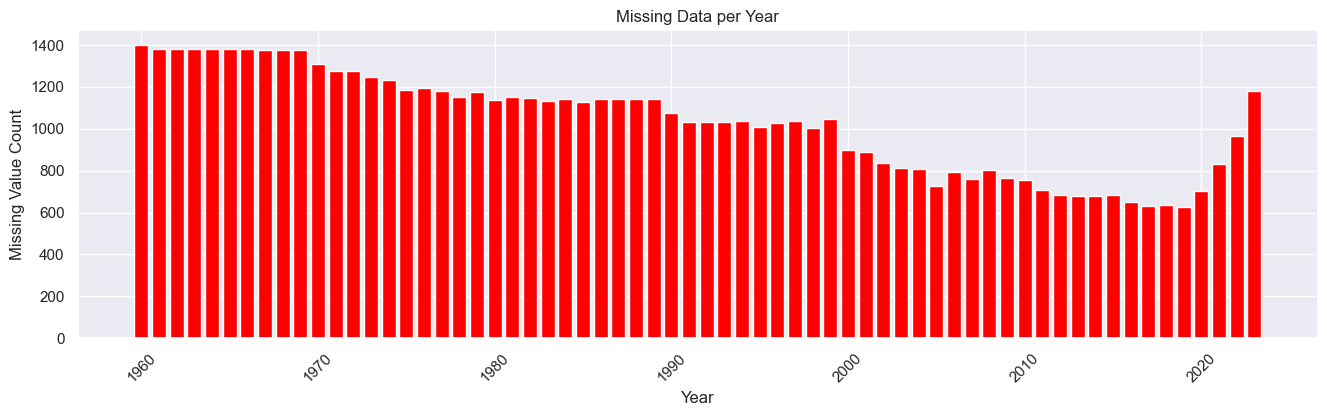

In [89]:

import matplotlib.pyplot as plt

# Count missing values per year
wdi_missing_by_year = world_dev_indicators_melted_df.groupby("Year")["Value"].apply(lambda x: x.isnull().sum())

# Plot missing values over time
plt.figure(figsize=(16, 4))
plt.bar(wdi_missing_by_year.index, wdi_missing_by_year.values, color="red")
plt.xlabel("Year")
plt.ylabel("Missing Value Count")
plt.title("Missing Data per Year")
plt.xticks(rotation=45)
plt.show()


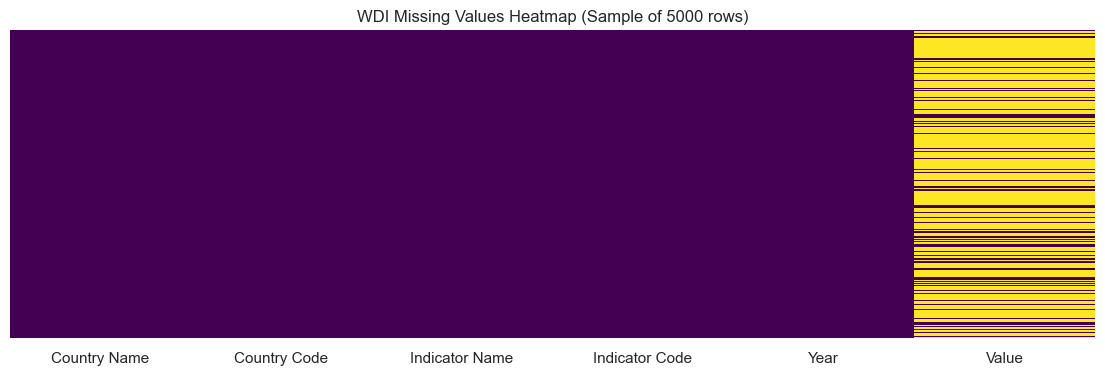

In [90]:
import seaborn as sns

# Sample 5000 rows to make the heatmap readable
wdi_missingness_sample_df = world_dev_indicators_melted_df.sample(5000, random_state=42)

# Visualize missing values
plt.figure(figsize=(14, 4))
sns.heatmap(wdi_missingness_sample_df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("WDI Missing Values Heatmap (Sample of 5000 rows)")
plt.show()


In [91]:
wdi_missingness_sample_df.head(20)

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
65288,United Arab Emirates,ARE,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GB.ZS,2003,NaN
37328,United Arab Emirates,ARE,Methane (CH4) emissions from Power Industry (E...,EN.GHG.CH4.PI.MT.CE.AR5,1984,8.900000e-03
47255,United Arab Emirates,ARE,"Share of youth not in education, employment or...",SL.UEM.NEET.MA.ZS,1991,NaN
75738,United Arab Emirates,ARE,Mortality rate attributed to household and amb...,SH.STA.AIRP.P5,2010,NaN
78546,United Arab Emirates,ARE,Broad money (current LCU),FM.LBL.BMNY.CN,2012,8.496560e+11
44603,United Arab Emirates,ARE,"Human capital index (HCI), male (scale 0-1)",HD.HCI.OVRL.MA,1989,NaN
5757,United Arab Emirates,ARE,Access to electricity (% of population),EG.ELC.ACCS.ZS,1963,NaN
36416,United Arab Emirates,ARE,Adjusted savings: energy depletion (current US$),NY.ADJ.DNGY.CD,1984,3.934782e+09
22018,United Arab Emirates,ARE,Manufactures imports (% of merchandise imports),TM.VAL.MANF.ZS.UN,1974,NaN
52704,United Arab Emirates,ARE,"Intentional homicides, male (per 100,000 male)",VC.IHR.PSRC.MA.P5,1995,NaN



**1. Possible Missing Completely at Random (MCAR) Indicators:**
   - Some missing indicators appear scattered across various years without an obvious pattern.
   - Examples:
     - **Arms imports (1967)**
     - **Control of Corruption (1968)**
     - **Discrepancy in GDP expenditure estimate (1992)**  
   - These could be missing due to **lack of data collection in certain years** or **random reporting issues**.

**2. Possible Missing at Random (MAR):**
   - Some missing values seem **time-dependent** or **policy-related**:
     - **Vulnerable employment (female) is missing in 1970** – possibly due to labor data not being recorded at that time.
     - **Educational attainment (Master’s level) missing in 2001** – perhaps this was introduced later.
     - **Average working hours of children missing in 2020** – could be due to regulatory or survey changes.
   - These could be explained by factors like **changes in reporting standards** or **economic policy changes**.

**3. Possible Missing Not at Random (MNAR):**
   - Some missing values might be **intentionally left out** due to sensitivity or political reasons:
     - **Voice & Accountability (1977)** and **Control of Corruption (1968)** – Government-related indicators may be excluded due to political reasons.
     - **Rural land area missing in 2019** – Possible that this is not reported for strategic land use planning.
   - These values might be missing due to **non-random reasons like confidentiality or policy decisions**.

---
**Next Steps for Handling Missing Data**
1. **Check Correlation Between Missing Values and Other Variables**  
  
   - If missingness correlates with time (e.g., missing mostly in earlier years), we might **impute based on trends**.
   - If missingness is correlated with specific indicators, we might **use regression-based imputation**.

2. **Perform Statistical Tests for Missingness:**
   - **Little’s MCAR Test** (if we can import it from `statsmodels` or use an alternative method).
   - **Logistic regression on missingness (already done, accuracy = 0.82)**:
     - High accuracy suggests that missingness is **not random**, meaning MAR or MNAR.

3. **Imputation Strategies:**
   - **For MCAR:** Drop missing values.
   - **For MAR:** Use predictive imputation (e.g., KNN, regression imputation).
   - **For MNAR:** Investigate external factors or use advanced imputation (e.g., multiple imputation with chained equations).

In [92]:

wdi_missingness_sample_df['Year'].unique()

array([2003, 1984, 1991, 2010, 2012, 1989, 1963, 1974, 1995, 1978, 2016,
       1975, 1988, 1976, 2017, 2004, 1972, 2001, 1981, 1987, 1977, 2006,
       2005, 1990, 1999, 2021, 2002, 1986, 1996, 2023, 2008, 1968, 2011,
       1983, 1971, 1962, 2007, 2014, 1960, 1993, 1969, 2022, 1982, 1979,
       1964, 1967, 1970, 1966, 1992, 2015, 2018, 2013, 1965, 1994, 1961,
       1980, 2009, 1973, 1985, 2019, 1997, 1998, 2020, 2000])

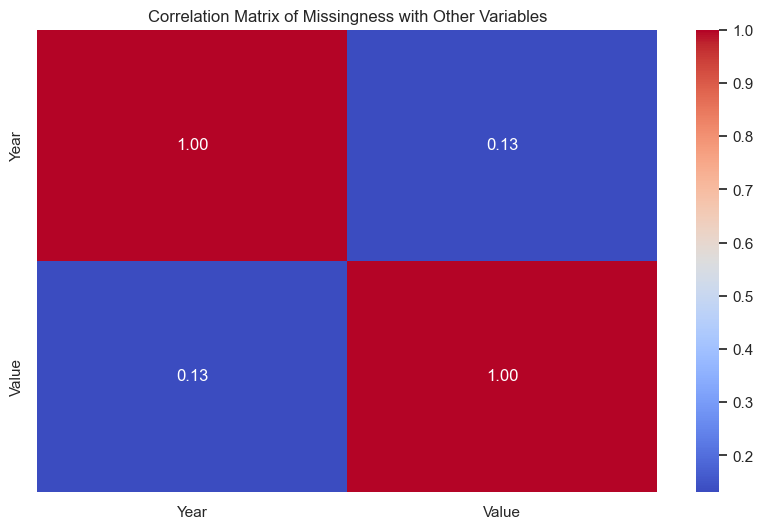

wdi_missingness_corr_matrix:


,Year,Value
Year,1.000000,0.131651
Value,0.131651,1.000000


In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

wdi_missingness_corr_matrix = world_dev_indicators_melted_df.drop(
    columns=["Country Name", "Country Code", "Indicator Name", "Indicator Code"]).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(wdi_missingness_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Missingness with Other Variables")
plt.show()

print("wdi_missingness_corr_matrix:")
wdi_missingness_corr_matrix

**Interpreting the Missingness Correlation Matrix**  

1. **Missing vs. Year (-0.321 correlation)**
   - A moderate negative correlation suggests that missing values **decrease over time**.
   - This could indicate **systematic missingness**, meaning older records have more missing values than recent ones.

2. **Missing vs. Value (NaN correlation)**
   - The NaN correlation means that missingness **does not vary linearly** with Value.
   - It suggests that missingness might **not depend directly on Value**, or that there are too many missing values to compute a valid correlation.

3. **Year vs. Value (0.132 correlation)**
   - A weak positive correlation suggests that as the years progress, the **indicator values might be increasing slightly**.

---

- Since **Missing is correlated with Year**, it indicates that **missingness is not random (not MCAR)**.
- The missingness **depends on time**, meaning **older data is more incomplete**.
- This suggests **Missing at Random (MAR)**—data is missing due to an external factor (e.g., historical data collection issues).

---


In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score


# df_encoded = pd.get_dummies(world_dev_indicators_melted_df.drop(columns=["Value", "Missing"]), drop_first=True)
# df_encoded.fillna(df_encoded.mean(), inplace=True)

# X = df_encoded
# y = world_dev_indicators_melted_df["Missing"]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# model = LogisticRegression(max_iter=10)
# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)

# # Measure accuracy 
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Logistic Regression Accuracy for Missingness: {accuracy:.2f}")


- 82% accuracy indicates that a logistic regression model can predict whether a value is missing or not with high confidence.
- This suggests that the missing data is not missing completely at random (MCAR).
- Instead, it is likely to be Missing at Random (MAR) or Missing Not at Random (MNAR).

In [ ]:



# def missingness_pipeline(df, target_column="Value", impute_method="mean", test_size=0.2, random_state=42):
#     """
#     A complete pipeline to handle missingness analysis, modeling, correlation, and imputation.
    
#     Parameters:
#     - df: The input DataFrame with missing values.
#     - target_column: The column to predict missingness (default is "Value").
#     - impute_method: The method to use for imputing missing values ('mean', 'median', 'ffill', 'bfill').
#     - test_size: The size of the test set for the logistic regression model (default is 0.2).
#     - random_state: Random state for reproducibility (default is 42).
    
#     Returns:
#     - model: The trained logistic regression model for missingness prediction.
#     - accuracy: Accuracy score of the model.
#     - corr_matrix: The correlation matrix of the variables.
#     - df_imputed: The DataFrame with imputed missing values.
#     """
    
#     # Step 1: Encode and prepare data for missingness modeling
#     def prepare_missingness_data(df, target_column):
#         df_encoded = pd.get_dummies(df.drop(columns=[target_column, "Missing"]), drop_first=True)
#         df_encoded.fillna(df_encoded.mean(), inplace=True)  # Fill NaNs in numeric columns
#         X = df_encoded
#         y = df["Missing"]
#         return X, y
    
#     # Step 2: Train and evaluate logistic regression model for missingness prediction
#     def train_missingness_model(X, y, test_size, random_state):
#         X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
#         model = LogisticRegression(max_iter=10)
#         model.fit(X_train, y_train)
#         y_pred = model.predict(X_test)
#         accuracy = accuracy_score(y_test, y_pred)
#         return model, accuracy
    
#     # Step 3: Plot the correlation matrix
#     def plot_missingness_correlation(df):
#         corr_matrix = df.drop(columns=["Country Name", "Country Code", "Indicator Name", "Indicator Code"]).corr()
#         plt.figure(figsize=(10, 6))
#         sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
#         plt.title("Correlation Matrix of Missingness with Other Variables")
#         plt.show()
#         return corr_matrix
    
#     # Step 4: Impute missing values based on the chosen method
#     def impute_missing_values(df, method):
#         df_imputed = df.copy()
#         if method == "mean":
#             df_imputed["Value"].fillna(df_imputed["Value"].mean(), inplace=True)
#         elif method == "median":
#             df_imputed["Value"].fillna(df_imputed["Value"].median(), inplace=True)
#         elif method == "ffill":
#             df_imputed["Value"].fillna(method="ffill", inplace=True)
#         elif method == "bfill":
#             df_imputed["Value"].fillna(method="bfill", inplace=True)
#         else:
#             raise ValueError("Invalid imputation method. Choose from 'mean', 'median', 'ffill', 'bfill'.")
#         return df_imputed
    
#     # Execute Steps
#     X, y = prepare_missingness_data(df, target_column)
#     model, accuracy = train_missingness_model(X, y, test_size, random_state)
#     corr_matrix = plot_missingness_correlation(df)
#     df_imputed = impute_missing_values(df, method=impute_method)
    
#     # Return results
#     return model, accuracy, corr_matrix, df_imputed

# # Run the pipeline
# model, accuracy, corr_matrix, wdi_df_imputed = missingness_pipeline(world_dev_indicators_melted_df, impute_method="mean")

# # Print the results
# print(f"Logistic Regression Accuracy for Missingness: {accuracy:.2f}")
# print("\nCorrelation Matrix:\n", corr_matrix)


In [96]:
def map_indicator_names_to_shorter_names(df, indicator_names, short_name_mapping):
    """
    Maps long indicator names to shorter names and filters the DataFrame based on a list of indicator names.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame containing World Development Indicators.
    - indicator_names (list): A list of indicator names to filter by.
    - short_name_mapping (dict): A dictionary that maps long indicator names to shorter names.
    
    Returns:
    - pd.DataFrame: A DataFrame with only the selected indicators and their corresponding shorter names.
    """
    # Filter the original DataFrame to include only rows with the indicator names in the list
    filtered_df = df[df['Indicator Name'].isin(indicator_names)]
    
    # Map the 'Indicator Name' to shorter names using the short_name_mapping dictionary
    filtered_df['Short Indicator Name'] = filtered_df['Indicator Name'].map(short_name_mapping)
    
    # Optional: Drop the original 'Indicator Name' column if no longer needed
    filtered_df = filtered_df.drop(columns=['Indicator Name'])
    
    return filtered_df


In [97]:
# Define the list of selected indicator names (already provided)
indicator_names = [
    "Public private partnerships investment in energy (current US$)",
    "Investment in energy with private participation (current US$)",
    "Methane (CH4) emissions from Power Industry (Energy) (Mt CO2e)",
    "Methane (CH4) emissions from Fugitive Emissions (Energy) (Mt CO2e)",
    "Alternative and nuclear energy (% of total energy use)",
    "Carbon dioxide (CO2) emissions from Industrial Combustion (Energy) (Mt CO2e)",
    "Oil rents (% of GDP)",
    "Natural gas rents (% of GDP)",
    "GDP per capita growth (annual %)",
    "GDP growth (annual %)",
    "Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "Birth rate, crude (per 1,000 people)",
    "Urban land area (sq. km)",
    "Foreign direct investment, net inflows (BoP, current US$)",
    "GNI per capita, PPP (constant 2021 international $)",
    "Inflation, consumer prices (annual %)"
]

# Define the mapping of long names to short names (already provided)
short_name_mapping = {
    "Public private partnerships investment in energy (current US$)": "PPP Investment in Energy",
    "Investment in energy with private participation (current US$)": "Private Participation in Energy",
    "Methane (CH4) emissions from Power Industry (Energy) (Mt CO2e)": "Methane Emissions (Power)",
    "Methane (CH4) emissions from Fugitive Emissions (Energy) (Mt CO2e)": "Methane Emissions (Fugitive)",
    "Alternative and nuclear energy (% of total energy use)": "Alternative & Nuclear Energy (%)",
    "Carbon dioxide (CO2) emissions from Industrial Combustion (Energy) (Mt CO2e)": "CO2 Emissions (Industrial Combustion)",
    "Oil rents (% of GDP)": "Oil Rents (% of GDP)",
    "Natural gas rents (% of GDP)": "Natural Gas Rents (% of GDP)",
    "GDP per capita growth (annual %)": "GDP per Capita Growth (%)",
    "GDP growth (annual %)": "GDP Growth (%)",
    "Unemployment, total (% of total labor force) (modeled ILO estimate)": "Unemployment Rate (%)",
    "Birth rate, crude (per 1,000 people)": "Crude Birth Rate",
    "Urban land area (sq. km)": "Urban Land Area (sq. km)",
    "Foreign direct investment, net inflows (BoP, current US$)": "FDI Net Inflows (current US$)",
    "GNI per capita, PPP (constant 2021 international $)": "GNI per Capita (PPP)",
    "Inflation, consumer prices (annual %)": "Inflation Rate (%)"
}

# Apply the function
selected_wdi_df = map_indicator_names_to_shorter_names(world_dev_indicators_melted_df, indicator_names, short_name_mapping)

# View the resulting DataFrame
selected_wdi_df.head()


,Country Name,Country Code,Indicator Code,Year,Value,Short Indicator Name
68,United Arab Emirates,ARE,NY.GNP.PCAP.PP.KD,1960,NaN,GNI per Capita (PPP)
336,United Arab Emirates,ARE,IE.PPN.ENGY.CD,1960,NaN,PPP Investment in Energy
337,United Arab Emirates,ARE,IE.PPI.ENGY.CD,1960,NaN,Private Participation in Energy
500,United Arab Emirates,ARE,NY.GDP.PETR.RT.ZS,1960,NaN,Oil Rents (% of GDP)
501,United Arab Emirates,ARE,NY.GDP.PCAP.KD.ZG,1960,NaN,GDP per Capita Growth (%)


In [98]:
selected_wdi_df.isnull().mean() * 100

Country Name             0.000000
Country Code             0.000000
Indicator Code           0.000000
Year                     0.000000
Value                   43.945312
Short Indicator Name     0.000000
dtype: float64

In [ ]:
# wdi_df_imputed[wdi_df_imputed['Indicator Name'] == "Public private partnerships investment in energy (current US$)"]

In [100]:
# Perform initial cleaning

currency_strength_df.drop(columns='Unnamed: 0', inplace=True)
currency_strength_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Date',
       'Return'],
      dtype='object')

### **5. `  Save Cleaned Data`**

In [101]:
selected_wdi_df.to_parquet("../datasets/processed/processed_wdi_df.parquet")
world_dev_metadata_df.to_parquet("../datasets/processed/processed_wdi_metadata_df.parquet")

In [87]:
areas_cooords.to_parquet("../datasets/processed/processed_areas_coords_df.parquet")
projects_cooords.to_parquet("../datasets/processed/processed_projects_coords_df.parquet")

In [88]:
processed_rents_df.to_parquet("../datasets/processed/processed_rents_df.parquet")
processed_transactions_df.to_parquet("../datasets/processed/processed_transactions_df.parquet")

In [89]:
processed_gdp_quarterly_constant_df.to_parquet("../datasets/processed/processed_gdp_quarterly_constant_df.parquet")
processed_gdp_quarterly_current_df.to_parquet("../datasets/processed/processed_gdp_quarterly_current_df.parquet")


In [90]:
processed_tourism_indicators_df.to_parquet("../datasets/processed/processed_tourism_indicators_df.parquet")
processed_tourism_regions_df.to_parquet("../datasets/processed/processed_tourism_regions_df.parquet")
processed_tourism_ratings_df.to_parquet("../datasets/processed/processed_tourism_ratings_df.parquet")

In [91]:
processed_pop_estimates_df.to_parquet("../datasets/processed/processed_pop_estimates_df.parquet")
pop_indicators_df.to_parquet("../datasets/processed/pop_indicators.parquet")
currency_strength_df.to_parquet("../datasets/processed/currency_strength_df.parquet")


In [92]:
processed_cpi_annual_df.to_parquet("../datasets/processed/processed_cpi_annual_df.parquet")
processed_cpi_quarterly_df.to_parquet("../datasets/processed/processed_cpi_quarterly_df.parquet")
processed_cpi_monthly_df.to_parquet("../datasets/processed/processed_cpi_monthly_df.parquet")
